<a href="https://colab.research.google.com/github/shintaroudlotulhanafia/DRLforMultipleStocksTradingUsingFinRL/blob/main/PandemicTestRobustness/61_PandemicDataOnTrainingandTrading_TugasAkhirS1_Shinta_DRLforMultipleStocksTradingUsingFinRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandemic Data On Trading and Training-full version dijalankan menggunakan email shintarh18@gmail.com

# Deep Reinforcement Learning untuk Jual-Beli Saham (Dari Awal): Jual-beli Banyak Saham 

* **Pytorch Version** 



**Memasangkan Google Drive ke Google Colab**

* Kata kunci **from** digunakan untuk mengimpor hanya bagian tertentu dari modul (melakukan impor untuk bagian tertentu pada *library*)
* Modul merupakan file yang berisi sekumpulan fungsi yang ingin disertakan dalam aplikasi. Untuk membuat modul cukup simpan kode yang Anda inginkan dalam file dengan ekstensi file .py.
* **import** melakukan impor seluruh *library*.
* **Mounting** adalah proses membuat file dan direktori pada perangkat penyimpanan (seperti google drive) sehingga tersedia bagi pengguna untuk dapat diakses.



In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Daftar Isi:

* [1. Pendeskrisian Tugas](#0)
* [2. Instalasi Paket Python](#1)
    * [2.1. Instalasi Paket](#1.1)    
    * [2.2. Daftar Paket Python](#1.2)
    * [2.3. Impot Paket](#1.3)
    * [2.4. Membuat Folder](#1.4)
* [3. Mengunduh Data](#2)
* [4. Memproses Data](#3)        
    * [4.1. IndiKator Teknikal](#3.1)
    * [4.2. Melakukan *Feature Engineering*](#3.2)
* [5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style](#4)  
    * [5.1. Pemisahan Data](#4.1)  
    * [5.2. Lingkungan untuk Pelatihan *(Training)*](#4.2)    
* [6. Melatih Agen DRL](#5)
    * [6.1. Agen 1: A2C](#5.1)
    * [6.2. Agen 2: PPO](#5.2)
    * [6.3. Agen 3: TD3](#5.3)
    * [6.4. Agen 4: SAC](#5.4)
    * [6.5. Agen 5: DDPG](#5.5)
* [7. Melakukan Jual-Beli](#6)
    * [7.1. Performa di Dalam Sampel](#6.1)
    * [7.2. Performa di Luar Sampel](#6.2)
    * [7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi](#6.3)
      * [7.3.1. Agen 1: A2C](#6.3.1)
      * [7.3.2. Agen 2: PPO](#6.3.2)
      * [7.3.3. Agen 3: TD3](#6.3.3)
      * [7.3.4. Agen 4: SAC](#6.3.4)
      * [7.3.5. Agen 5: DDPG](#6.3.5)
    * [7.4. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi (dalam bentuk string)](#6.3)
      * [7.4.1. Agen 1: A2C](#6.4.1)
      * [7.4.2. Agen 2: PPO](#6.4.2)
      * [7.4.3. Agen 3: TD3](#6.4.3)
      * [7.4.4. Agen 4: SAC](#6.4.4)
      * [7.4.5. Agen 5: DDPG](#6.4.5)
    * [7.5. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Kondisi dan Aksi](#6.4)
      * [7.5.1. Agen 1: A2C](#6.4.1)
      * [7.5.2. Agen 2: PPO](#6.4.2)
      * [7.5.3. Agen 3: TD3](#6.4.3)
      * [7.5.4. Agen 4: SAC](#6.4.4)
      * [7.5.5. Agen 5: DDPG](#6.4.5)
* [8. Performa Backtesting](#7)  
    * [8.1. Status BackTesting](#7.1)
    * [8.2. Gambaran BackTesting](#7.2)

<a id='0'></a>
# Bagian 1. Pendeskrisian Tugas

Agen DRL dilatih untuk melakukan jual-beli saham. Tugas tersebut dimodelkan sebagai Markov Decision Process (MDP), dengan fungsi dan tujuannya adalah memaksimalkan pengembalian pengembalian kumulatif *(cummulative return)* yang diharapkan.

Definisi state-action-reward pada algoritam DRL kasus kali ini adalah sebagai berikut:

* **State s**: Kondisi atau *state* mewakili persepsi agen tentang lingkungan pasar. Sama seperti *trader* manusia yang menganalisis berbagai informasi, agen juga secara pasif mengamati banyak fitur dan belajar dengan cara berinteraksi dengan lingkungan pasar (biasanya dengan menjalankan ulang data historis).

* **Tindakan atau *action* a**: Ruang aksi mencakup aksi atau tindakan yang dapat dilakukan agen di setiap status atau kondisi. Misalnya, a {−1, 0, 1}, -1 berarti menjual, 0 berarti menahan, dan 1 berarti membeli. Ketika suatu aksi mengoperasikan beberapa saham, maka, a {−k, ..., 1, 0, 1, ..., k}. Misalnya, "Beli
10 saham TLKM" atau "Jual 10 saham TLKM" maka masing-masing nilai a adalah 10 atau -10.

* **Fungsi *reward* atau imbalan r(s, a, s′)**: *Reward* adalah insentif bagi agen untuk mempelajari kebijakan yang lebih baik. Misalnya *reward* dapat berupa perubahan nilai portofolio saat mengambil a pada keadaan s dan tiba pada keadaan baru s', yaitu, r(s, a, s′) = v′-v, v′ mewakili nilai portofolio pada keadaan s′ dan v mewakili nilai portofolio pada keadaan s.

* **Environment atau lingkungan jual-beli**: saham penyusun indeks JII dengan tanggal sesuai periode pengujian yang diatur.


Data untuk studi kasus ini diperoleh dari Yahoo Finance API. Data berisi harga *Open-High-Low-Close* dan *Volume*.

<a id='1'></a>
# Bagian 2. Instalasi Paket Python

<a id='1.1'></a>
## 2.1. Instalasi Paket


* FinRL adalah *open-source framework* pertama yang menunjukkan potensi besar *Reinforcement Learning* keuangan.

* FinRL menyediakan berbagai pengaturan untuk melakukan *trading* dengan *Reinforcement Learning* seperti menyediakan ratusan pasar keuangan, algoritma yang canggih, berbagai macam aplikasi keuangan (alokasi portofolio, perdagangan mata uang kripto, *high-frequency trading*), *live trading, cloud deployment,* dll.

* Pengaplikasian pustaka FinRL dapat menggunakan alamat berikut, git+https://github.com/AI4Finance-Foundation/FinRL.git. Namun, untuk kemudahan pengaturan nilai sesuai kebutuhan, maka, dilakukanlah *forking* terhadap *repository* tersebut, lalu digunakanlah alamat berikut, git+https://github.com/shintaroudlotulhanafia/FinRL.git



In [186]:
# install finrl library
!pip install git+https://github.com/shintaroudlotulhanafia/FinRL.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/shintaroudlotulhanafia/FinRL.git to /tmp/pip-req-build-wqu7jivn
  Running command git clone -q https://github.com/shintaroudlotulhanafia/FinRL.git /tmp/pip-req-build-wqu7jivn
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-4_07k0ma/pyfolio_d4ec1c8e762b494d80fa5c703c728f8f
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-4_07k0ma/pyfolio_d4ec1c8e762b494d80fa5c703c728f8f
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-4_07k0ma/elegantrl_33dd930d2f0e470ca7af02c3582fa545
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-4_07k0ma/elegantrl_33dd930d2f0e470ca7af02c3582fa545


<a id='1.2'></a>
## 2.2. Daftar Paket Python
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Impot Paket

* Modul Python **pandas** digunakan untuk menganalisis dan memanipulasi data.
* Modul Python **numpy** digunakan untuk memproses larik atau array.
* Modul Python **matplotlib** digunakan membuat visualisasi data dalam dua dimensi.
* Modul Python **matplotlib.pyplot** adalah kumpulan fungsi yang membuat matplotlib berfungsi seperti MATLAB.
* Modul Python **Datetime** menyediakan sejumlah fungsi untuk menangani tanggal, waktu, dan interval waktu. Date dan datetime adalah objek dalam Python, bukan string atau timestamps.
* **YahooDownloader** menyediakan metode untuk mengambil data saham harian dari API Keuangan Yahoo!
* **FeatureEngineer** menyediakan metode untuk preprocessing data harga saham
* **data_split** membagi dataset menjadi data pelatihan dan data pengujian berdasarkan tanggal
* **StockTradingEnv** Lingkungan perdagangan saham untuk OpenAI gym
* **DRLAgent** menyediakan implementasi untuk algoritma DRL
* **DataProcessor** memproses data menggunakan prosesor data terpadu
* **backtest_stats** menghitung statistik *backtesting*
* **backtest_plot** membuat dan menampilkan plot ringkasan laporan *backtesting*.
* **get_daily_return** 
* **get_baseline** mengunduh data berdasarkan suatu indeks pada periode waktu tertentu.
* Metode **sys.path.append()** digunakan untuk menambahkan jalur sementara. Dengan demikian, jalur tersebut akan valid untuk sebuah sesi, misalnya.
* Python **itertool** adalah modul yang menyediakan berbagai fungsi yang bekerja pada iterator untuk menghasilkan iterator yang kompleks. Modul ini berfungsi sebagai alat yang cepat dan hemat memori.

In [187]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

<a id='1.4'></a>
## 2.4. Membuat Folder

* **config** berisi pengaturan tanggal periode training dan trading, indikator, hyperparameter setiap model/agen DRL.
* **config_tickers** berisi pengaturan daftar saham yang akan diproses.
* **import os** digunakan untuk meng-import modul, merupakan module pada python agar python itu sendiri berinteraksi langsung terhadap sistem operasi.
* **check_and_make_directories** digunakan untuk mengecek dan membuat folder.


In [188]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Mengunduh Data

Yahoo Finance menyediakan data saham, berita keuangan, laporan keuangan, dll, secara gratis.
* FinRL *Library* menggunakan kelas **YahooDownloader** di FinRL-Meta untuk mengambil data melalui Yahoo Finance API
* Batas Pemanggilan: Menggunakan API Publik (tanpa autentikasi), Pengguna dibatasi hingga 2.000 permintaan per jam per IP (atau hingga total 48.000 permintaan per hari).

-----
kelas YahooDownloader:
    Mengambil data saham harian dari
    Yahoo Finance API

    Atribut
    ----------
        start_date : str
            tanggal mulai data
        end_date : str
            tanggal akhir data
        ticker_list : list
            daftar ticker saham (dimodifikasi dari config.py)

    Methods
    -------
    fetch_data()


Penetapan tanggal training dan trading dapat dilakukan dengan mengaturnya pada finrl/config.py atau dengan menetapkannya di sel notebook.

In [189]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-20'
TRADE_START_DATE = '2020-07-21'
TRADE_END_DATE = '2022-08-15'

In [190]:
#Data diperoleh dari idx.co.id diakses pada tanggal 27/08/2022
#Fraksi 1: <Rp200,00
fraksi1 = ['KIJA.JK', 'LCGP.JK', 'LMPI.JK', 'LPKR.JK']

#Fraksi 2: Rp200,00 - Rp500,00
fraksi2 = ['BMTR.JK','BTON.JK','FORU.JK','GEMA.JK']

#Fraksi 3: Rp500,00 - Rp2.000,00
fraksi3 = ['AKRA.JK','BRPT.JK','KLBF.JK','MEDC.JK']

#Fraksi 4: Rp2000,00 - Rp5000,00
fraksi4 = ['JECC.JK', 'TMAS.JK', 'TPIA.JK', 'UNVR.JK']

#Fraksi 5: >Rp5000,00
fraksi5 =['INCO.JK','INDF.JK','INTP.JK','UNTR.JK']



In [191]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.SelectedMultipleTickers).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (13480, 8)


* **df.shape** digunakan untuk mendapatkan jumlah baris dan kolom

In [192]:
df.shape

(13480, 8)

* **nunique()** mengembalikan jumlah nilai unik untuk setiap kolom. Dengan menentukan sumbu kolom ( axis='columns' ), metode nunique() mencari berdasarkan kolom tersebut dan mengembalikan jumlah nilai unik untuk setiap baris.

In [193]:
df.nunique()

date       3370
open       2141
high       2204
low        2199
close      5253
volume    11854
tic           4
day           5
dtype: int64

* **unique()** digunakan untuk menemukan elemen unik dari array. Mengembalikan elemen unik yang diurutkan dari sebuah array.

In [194]:
print(df['tic'].unique())

['BRPT.JK' 'KLBF.JK' 'SCMA.JK' 'UNVR.JK']


* **describe()** digunakan untuk menampilkan detail statistik dasar seperti persentil, mean, std, dll. Hanya kolom yang bertipe numerik yang akan ditampilkan statistiknya.

In [195]:
df.describe()

,open,high,low,close,volume,day
count,13480.000000,13480.000000,13480.000000,13480.000000,1.348000e+04,13480.000000
mean,2041.788879,2065.704246,2015.657568,1787.521863,4.926753e+07,1.984866
std,2775.294719,2801.634898,2746.024293,2440.249385,8.845015e+07,1.410718
min,11.800000,12.000000,11.600000,8.506120,0.000000e+00,0.000000
25%,282.000000,288.000000,276.000000,256.844666,7.722125e+06,1.000000
50%,732.000000,746.000000,720.000000,645.079041,2.298830e+07,2.000000
75%,1781.250000,1800.000000,1755.000000,1585.000000,5.675725e+07,3.000000
max,11235.000000,11620.000000,11180.000000,9885.864258,2.572153e+09,4.000000


Mengakses sejumlah baris dan kolom berdasarkan label.

In [196]:
df.loc[df['high'] == 11180]

,date,open,high,low,close,volume,tic,day
8863,2018-01-01,11180.0,11180.0,11180.0,9885.864258,0,UNVR.JK,0
8871,2018-01-03,11175.0,11180.0,10640.0,9549.850586,13805500,UNVR.JK,2


In [197]:
df.loc[df['high'] == 12]

,date,open,high,low,close,volume,tic,day
6820,2015-12-15,11.9,12.0,11.8,11.706642,5520000,BRPT.JK,1


In [198]:
df.loc[df['close'] < 50]

,date,open,high,low,close,volume,tic,day
2,2009-01-05,16.6,16.6,16.600000,8.936810,50,SCMA.JK,0
6,2009-01-06,16.4,16.4,16.400000,8.829136,87500,SCMA.JK,1
10,2009-01-07,16.4,16.4,16.400000,8.829136,50,SCMA.JK,2
14,2009-01-08,16.4,16.4,16.400000,8.829136,12500,SCMA.JK,3
18,2009-01-09,16.4,16.4,16.400000,8.829136,50,SCMA.JK,4
...,...,...,...,...,...,...,...,...
7384,2016-07-19,51.0,51.0,49.799999,48.777679,7051000,BRPT.JK,1
7388,2016-07-20,50.0,50.0,49.799999,48.777679,7331000,BRPT.JK,2
7392,2016-07-21,50.0,52.0,50.000000,49.753235,7893000,BRPT.JK,3
7396,2016-07-22,51.0,51.0,50.000000,48.777679,6502000,BRPT.JK,4


Melihat jumlah data dengan nilai 0 pada fitur volume

In [199]:
volume = (df.volume == 0).sum()

print("Nilai 0 di kolom bedrooms ada: ", volume)

Nilai 0 di kolom bedrooms ada:  357


<del>Menghapus Nilai 0 pada Variabel 'volume'</del>

In [200]:
#df = df.loc[(df[['volume']]!=0).all(axis=1)]

* **sort_values()** berfungsi mengurutkan bingkai data dalam urutan *ascending* atau *descending* dari kolom yang dilewati.
* **ignore_index** berfungsi untuk menentukan untuk mereset indeks mulai dari nol. Secara default disetel *false*.
* **head()** digunakan untuk mendapatkan n baris pertama.

In [201]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-05,61.0,70.0,60.0,64.386543,95470000,BRPT.JK,0
1,2009-01-05,81.0,84.0,80.0,63.608841,165165000,KLBF.JK,0
2,2009-01-05,16.6,16.6,16.6,8.936810,50,SCMA.JK,0
3,2009-01-05,1620.0,1620.0,1560.0,1149.686646,20,UNVR.JK,0
4,2009-01-06,66.0,71.0,62.0,60.484322,72175000,BRPT.JK,1


<a id='3'></a>
# Bagian 4: Memproses Data

Periksa data yang hilang dan melakukan *feature engineering* untuk mengubah data menjadi *state*.
* **Menambahkan indikator teknis**

  Dalam praktik jual-beli, berbagai informasi perlu diperhitungkan, seperti harga historis, kepemilikan saham saat ini, indikator teknis, dll. Indikator teknis yang dapat digunakan antara lain, MACD, RSI, CCI, ADX, Bollinger Bands, dll. 
* **Menambahkan indeks turbulensi**

  Risk-aversion mencerminkan seberapa berani investor melakukan jual-beli saham dengan risiko yang tinggi. Hal ini mempengaruhi strategi trading investor ketika menghadapi tingkat volatilitas pasar yang berbeda. Untuk mengendalikan risiko dalam skenario terburuk, seperti krisis keuangan tahun 1998, FinRL menggunakan indeks turbulensi yang mengukur fluktuasi harga aset yang ekstrem.



-----
kelas FeatureEngineer:
    Menyediakan metode untuk preprocessing data harga saham

    Attributes
    ----------
        use_technical_indicator : boolean
            menggunakan indikator teknis atau tidak
        tech_indicator_list : list
            daftar nama indikator teknis (dimodifikasi dari neofinrl_config.py)
        use_vix : boolean
            menggunakan Volatility Index (VIX) atau tidak
        use_turbulence : boolean
            menggunakan indeks turbulensi atau tidak
        user_defined_feature:boolean
            menggunakan fitur yang ditentukan pengguna atau tidak
    Methods
    -------
    preprocess_data()
        metode utama untuk melakukan feature engineering


In [202]:
INDICATORS = [
    "macd",
    "rsi_30",
    "cci_30"
]

Membersihkan data mentah dari nilai-nilai yang hilang. Sehingga saham dengan data yang hilang dihapus dari daftar.

In [203]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3425, 8)
Successfully added vix
Successfully added turbulence index


In [204]:
processed.describe()

,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
count,13104.000000,13104.000000,13104.000000,13104.000000,1.310400e+04,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000,13104.000000
mean,2040.587065,2064.586900,2014.374567,1786.250684,4.945259e+07,2.015263,3.146496,51.710371,5.905973,19.394438,4.121264
std,2773.851086,2800.296841,2744.371722,2438.716428,8.878238e+07,1.397683,49.866597,9.978210,117.960185,8.144199,7.511021
min,11.800000,12.000000,11.600000,8.506120,0.000000e+00,0.000000,-421.748772,0.000000,-707.544559,9.140000,0.000000
25%,280.000000,285.000000,275.000000,256.770569,7.798875e+06,1.000000,-6.575696,45.770483,-81.334554,13.740000,0.832749
50%,732.000000,746.000000,720.000000,643.101837,2.322780e+07,2.000000,0.461551,51.240142,4.664030,17.070000,2.127420
75%,1781.250000,1800.000000,1755.000000,1584.059326,5.701672e+07,3.000000,11.627079,57.127639,88.763247,22.592500,4.663303
max,11235.000000,11620.000000,11005.000000,9885.864258,2.572153e+09,4.000000,374.820856,100.000000,1000.000000,82.690002,135.569847


In [205]:
processed.nunique()

date           3276
open           2128
high           2189
low            2187
close          5185
volume        11558
tic               4
day               5
macd          13098
rsi_30        11443
cci_30        13092
vix            1721
turbulence     3023
dtype: int64

* **tolist()** digunakan untuk mengubah elemen data array menjadi *list*.
* **unique()** digunakan untuk menemukan elemen unik dari array. Mengembalikan elemen unik yang diurutkan dari sebuah array.

In [206]:
list_ticker = processed["tic"].unique().tolist()
list_ticker

['BRPT.JK', 'KLBF.JK', 'SCMA.JK', 'UNVR.JK']

* **date_range()** digunakan untuk mendapatkan frekuensi tetap DatetimeIndex. date_range() digunakan untuk membuat rentang tanggal di pandas.
* **max()** mengembalikan item dengan nilai tertinggi, atau item dengan nilai tertinggi dalam *iterable*. Jika nilainya adalah string, maka dilakukan perbandingan abjad.
* **min()** mengembalikan item dengan nilai terendah, atau item dengan nilai terendah dalam iterable. Jika nilainya adalah string,  maka dilakukan perbandingan abjad.
* **astype()** digunakan untuk mengubah tipe data dari suatu bentuk *series*.

In [207]:
list_date = list(pd.date_range(df['date'].min(),df['date'].max()).astype(str))
list_date

['2009-01-05',
 '2009-01-06',
 '2009-01-07',
 '2009-01-08',
 '2009-01-09',
 '2009-01-10',
 '2009-01-11',
 '2009-01-12',
 '2009-01-13',
 '2009-01-14',
 '2009-01-15',
 '2009-01-16',
 '2009-01-17',
 '2009-01-18',
 '2009-01-19',
 '2009-01-20',
 '2009-01-21',
 '2009-01-22',
 '2009-01-23',
 '2009-01-24',
 '2009-01-25',
 '2009-01-26',
 '2009-01-27',
 '2009-01-28',
 '2009-01-29',
 '2009-01-30',
 '2009-01-31',
 '2009-02-01',
 '2009-02-02',
 '2009-02-03',
 '2009-02-04',
 '2009-02-05',
 '2009-02-06',
 '2009-02-07',
 '2009-02-08',
 '2009-02-09',
 '2009-02-10',
 '2009-02-11',
 '2009-02-12',
 '2009-02-13',
 '2009-02-14',
 '2009-02-15',
 '2009-02-16',
 '2009-02-17',
 '2009-02-18',
 '2009-02-19',
 '2009-02-20',
 '2009-02-21',
 '2009-02-22',
 '2009-02-23',
 '2009-02-24',
 '2009-02-25',
 '2009-02-26',
 '2009-02-27',
 '2009-02-28',
 '2009-03-01',
 '2009-03-02',
 '2009-03-03',
 '2009-03-04',
 '2009-03-05',
 '2009-03-06',
 '2009-03-07',
 '2009-03-08',
 '2009-03-09',
 '2009-03-10',
 '2009-03-11',
 '2009-03-

* **Array** dapat menyimpan elemen hanya dari satu tipe. Sedangkan **list** juga dapat menyimpan elemen dari tipe data yang berbeda.
* **list()** digunakan untuk membuat objek *list*. Objek *list* adalah kumpulan yang berurutan dan dapat diubah.
* **itertools.product()** digunakan untuk mencari produk kartesius dari iterator yang diberikan, outputnya adalah urutan leksikografis.

In [208]:
combination = list(itertools.product(list_date,list_ticker))
combination

[('2009-01-05', 'BRPT.JK'),
 ('2009-01-05', 'KLBF.JK'),
 ('2009-01-05', 'SCMA.JK'),
 ('2009-01-05', 'UNVR.JK'),
 ('2009-01-06', 'BRPT.JK'),
 ('2009-01-06', 'KLBF.JK'),
 ('2009-01-06', 'SCMA.JK'),
 ('2009-01-06', 'UNVR.JK'),
 ('2009-01-07', 'BRPT.JK'),
 ('2009-01-07', 'KLBF.JK'),
 ('2009-01-07', 'SCMA.JK'),
 ('2009-01-07', 'UNVR.JK'),
 ('2009-01-08', 'BRPT.JK'),
 ('2009-01-08', 'KLBF.JK'),
 ('2009-01-08', 'SCMA.JK'),
 ('2009-01-08', 'UNVR.JK'),
 ('2009-01-09', 'BRPT.JK'),
 ('2009-01-09', 'KLBF.JK'),
 ('2009-01-09', 'SCMA.JK'),
 ('2009-01-09', 'UNVR.JK'),
 ('2009-01-10', 'BRPT.JK'),
 ('2009-01-10', 'KLBF.JK'),
 ('2009-01-10', 'SCMA.JK'),
 ('2009-01-10', 'UNVR.JK'),
 ('2009-01-11', 'BRPT.JK'),
 ('2009-01-11', 'KLBF.JK'),
 ('2009-01-11', 'SCMA.JK'),
 ('2009-01-11', 'UNVR.JK'),
 ('2009-01-12', 'BRPT.JK'),
 ('2009-01-12', 'KLBF.JK'),
 ('2009-01-12', 'SCMA.JK'),
 ('2009-01-12', 'UNVR.JK'),
 ('2009-01-13', 'BRPT.JK'),
 ('2009-01-13', 'KLBF.JK'),
 ('2009-01-13', 'SCMA.JK'),
 ('2009-01-13', 'UNV

* **Pandas DataFrame** adalah dua dimensi yang dapat berubah ukuran, struktur data tabular yang berpotensi heterogen dengan sumbu berlabel (baris dan kolom).
* **merge()** berfungsi untuk memperbarui konten dua DataFrame dengan menggabungkannya bersama-sama, menggunakan metode yang ditentukan.

In [209]:
processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0000
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0000
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0000
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0000
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19867,2022-08-11,UNVR.JK,4790.0,4800.0,4740.0,4750.000000,17603200.0,3.0,-24.118255,52.286216,-16.570560,20.200001,0.4892
19868,2022-08-12,BRPT.JK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19869,2022-08-12,KLBF.JK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19870,2022-08-12,SCMA.JK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **isin()** digunakan untuk memfilter data frames. isin() dapat membantu untuk memilih baris dengan memiliki nilai tertentu (atau beberapa nilai tertentu) dalam kolom tertentu.

In [210]:
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154
19864,2022-08-11,BRPT.JK,1060.0,1065.0,1035.0,1060.000000,36794400.0,3.0,57.831069,65.817479,136.627907,20.200001,0.489200
19865,2022-08-11,KLBF.JK,1610.0,1610.0,1585.0,1585.000000,39752900.0,3.0,-21.614526,46.022921,-104.711078,20.200001,0.489200
19866,2022-08-11,SCMA.JK,252.0,256.0,246.0,248.000000,205939900.0,3.0,7.535306,55.145174,111.446732,20.200001,0.489200


In [211]:
processed_full = processed_full.sort_values(['date','tic'])
processed_full

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154
19864,2022-08-11,BRPT.JK,1060.0,1065.0,1035.0,1060.000000,36794400.0,3.0,57.831069,65.817479,136.627907,20.200001,0.489200
19865,2022-08-11,KLBF.JK,1610.0,1610.0,1585.0,1585.000000,39752900.0,3.0,-21.614526,46.022921,-104.711078,20.200001,0.489200
19866,2022-08-11,SCMA.JK,252.0,256.0,246.0,248.000000,205939900.0,3.0,7.535306,55.145174,111.446732,20.200001,0.489200


* **fillna()** digunakan untuk mengisi nilai NA/NaN menggunakan metode yang ditentukan. fillna(0) artinya baris NA/NaN diisi dengan nilai misalnya 0.

In [212]:
processed_full = processed_full.fillna(0)
processed_full

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154
19864,2022-08-11,BRPT.JK,1060.0,1065.0,1035.0,1060.000000,36794400.0,3.0,57.831069,65.817479,136.627907,20.200001,0.489200
19865,2022-08-11,KLBF.JK,1610.0,1610.0,1585.0,1585.000000,39752900.0,3.0,-21.614526,46.022921,-104.711078,20.200001,0.489200
19866,2022-08-11,SCMA.JK,252.0,256.0,246.0,248.000000,205939900.0,3.0,7.535306,55.145174,111.446732,20.200001,0.489200


In [213]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.0
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.0
5,2009-01-06,KLBF.JK,81.0,82.0,80.0,63.608841,44137500.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.0
6,2009-01-06,SCMA.JK,16.4,16.4,16.4,8.829136,87500.0,1.0,-0.002416,0.000000,-66.666667,38.560001,0.0
7,2009-01-06,UNVR.JK,1620.0,1670.0,1600.0,1163.880371,16432500.0,1.0,0.318449,100.000000,66.666667,38.560001,0.0
8,2009-01-07,BRPT.JK,63.0,70.0,61.0,61.459873,80160000.0,2.0,-0.081304,20.547881,-100.000000,43.389999,0.0
9,2009-01-07,KLBF.JK,81.0,83.0,80.0,63.608841,166020000.0,2.0,0.000000,20.547881,0.000000,43.389999,0.0


In [214]:
processed_full.nunique()

date           3276
tic               4
open           2128
high           2189
low            2187
close          5185
volume        11558
day               5
macd          13098
rsi_30        11443
cci_30        13092
vix            1721
turbulence     3023
dtype: int64

* **info()** berfungsi untuk mencetak informasi tentang DataFrame. Informasi tersebut berisi jumlah kolom, label kolom, tipe data kolom, penggunaan memori, indeks rentang, dan jumlah sel di setiap kolom (nilai bukan nol).

In [215]:
processed_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 19867
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        13104 non-null  object 
 1   tic         13104 non-null  object 
 2   open        13104 non-null  float64
 3   high        13104 non-null  float64
 4   low         13104 non-null  float64
 5   close       13104 non-null  float64
 6   volume      13104 non-null  float64
 7   day         13104 non-null  float64
 8   macd        13104 non-null  float64
 9   rsi_30      13104 non-null  float64
 10  cci_30      13104 non-null  float64
 11  vix         13104 non-null  float64
 12  turbulence  13104 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.4+ MB


* **to_csv()** mengonversi DataFrame menjadi data CSV/comma separated value (nilai yang dipisahkan koma). Kita dapat melewatkan objek file untuk menulis data CSV ke dalam file. Jika tidak, data CSV dikembalikan dalam format string.
* **loc** berbasis label, yang berarti baris dan kolom diambil berdasarkan label baris dan kolomnya. **iloc** berbasis posisi integer, maka baris dan kolom dapat diambil dengan menggunakan nilai posisi integernya (posisi integer berbasis 0).

In [216]:
#Save the dataset by the tic filter
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  df_temp.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/DatasetsPerTic/PandemicDataOnTrainingAndTrading/'+ stock +'.csv',index=False)
  display(df_temp)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
4,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484322,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
8,2009-01-07,BRPT.JK,63.0,70.0,61.0,61.459873,80160000.0,2.0,-0.081304,20.547881,-100.000000,43.389999,0.000000
12,2009-01-08,BRPT.JK,64.0,65.0,61.0,62.435429,29180000.0,3.0,-0.041249,34.475999,-133.333333,42.560001,0.000000
16,2009-01-09,BRPT.JK,62.0,66.0,62.0,60.484322,42590000.0,4.0,-0.096254,25.299899,-82.652044,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386
19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580
19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648
19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608841,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
5,2009-01-06,KLBF.JK,81.0,82.0,80.0,63.608841,44137500.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.000000
9,2009-01-07,KLBF.JK,81.0,83.0,80.0,63.608841,166020000.0,2.0,0.000000,20.547881,0.000000,43.389999,0.000000
13,2009-01-08,KLBF.JK,81.0,81.0,80.0,63.608841,59210000.0,3.0,0.000000,34.475999,-100.000000,42.560001,0.000000
17,2009-01-09,KLBF.JK,81.0,96.0,81.0,74.602974,397677500.0,4.0,0.437482,100.000000,166.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386
19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580
19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648
19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936810,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
6,2009-01-06,SCMA.JK,16.4,16.4,16.4,8.829136,87500.0,1.0,-0.002416,0.000000,-66.666667,38.560001,0.000000
10,2009-01-07,SCMA.JK,16.4,16.4,16.4,8.829136,50.0,2.0,-0.003078,0.000000,-50.000000,43.389999,0.000000
14,2009-01-08,SCMA.JK,16.4,16.4,16.4,8.829136,12500.0,3.0,-0.003304,0.000000,-44.444444,42.560001,0.000000
18,2009-01-09,SCMA.JK,16.4,16.4,16.4,8.829136,50.0,4.0,-0.003357,0.000000,-41.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386
19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580
19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648
19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
3,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686646,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
7,2009-01-06,UNVR.JK,1620.0,1670.0,1600.0,1163.880371,16432500.0,1.0,0.318449,100.000000,66.666667,38.560001,0.000000
11,2009-01-07,UNVR.JK,1560.0,1660.0,1550.0,1107.105713,20.0,2.0,-1.354812,19.463155,-58.540316,43.389999,0.000000
15,2009-01-08,UNVR.JK,1590.0,1610.0,1570.0,1128.395996,20.0,3.0,-1.313963,38.635054,-59.838747,42.560001,0.000000
19,2009-01-09,UNVR.JK,1600.0,1630.0,1580.0,1135.492676,20.0,4.0,-0.981711,43.290124,-2.720547,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386
19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580
19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154


In [217]:
#memperbarui dataframe dengan bentuk harga per lot

processed_full_lot = processed_full[['open','high','low','close']].mul(100)

#drop some columns
processed_full_noOHLC = processed_full.drop(['open','high','low','close'], axis=1)
  
processed_full_lot = pd.concat([processed_full_noOHLC, processed_full_lot], axis=1)

processed_full_lot = processed_full_lot[['date', 'tic', 'open', 'high', 'low', 'close', 'volume', 'day', 'macd', 'rsi_30', 'cci_30', 'vix', 'turbulence']]

processed_full_lot

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,6100.000000,7000.000000,6000.000000,6438.654327,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
1,2009-01-05,KLBF.JK,8100.000000,8400.000000,8000.000000,6360.884094,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
2,2009-01-05,SCMA.JK,1660.000038,1660.000038,1660.000038,893.681049,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
3,2009-01-05,UNVR.JK,162000.000000,162000.000000,156000.000000,114968.664551,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
4,2009-01-06,BRPT.JK,6600.000000,7100.000000,6200.000000,6048.432159,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,2022-08-10,UNVR.JK,472000.000000,478000.000000,466000.000000,478000.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154
19864,2022-08-11,BRPT.JK,106000.000000,106500.000000,103500.000000,106000.000000,36794400.0,3.0,57.831069,65.817479,136.627907,20.200001,0.489200
19865,2022-08-11,KLBF.JK,161000.000000,161000.000000,158500.000000,158500.000000,39752900.0,3.0,-21.614526,46.022921,-104.711078,20.200001,0.489200
19866,2022-08-11,SCMA.JK,25200.000000,25600.000000,24600.000000,24800.000000,205939900.0,3.0,7.535306,55.145174,111.446732,20.200001,0.489200


<a id='4'></a>
# Bagian 5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style
Proses *training* meliputi mengamati perubahan harga saham, mengambil tindakan dan perhitungan *reward*. Dengan berinteraksi dengan lingkungan pasar, agen pada akhirnya akan memperoleh strategi perdagangan yang dapat memaksimalkan imbalan.

*Environment* pasar dibangun  menggunakan OpenAI Gym yang mensimulasikan pasar saham dengan data historis pasar.

<a id='4.1'></a>
## 5.1. Memisahkan Data
Data dibagi menjadi dua bagian, yaitu bagian pelatihan dan bagian pengujian dengan keterangan sebagai berikut:

Periode data pelatihan: 2009-01-01 hingga 2017-12-31

Periode data perdagangan: 2018-01-01 hingga 2022-08-15

* **data_split** membagi data menjadi himpunan *train, test,* dan/atau *validation.*
* **len()** mengembalikan jumlah item dalam suatu objek. Namun, jika objek adalah string, maka fungsi len() akan mengembalikan jumlah karakter dalam string.
* **tail()** digunakan untuk mendapatkan n baris terakhir.

In [218]:
train = data_split(processed_full_lot, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full_lot, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

11156
1944


In [219]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2787,2020-07-16,UNVR.JK,805000.0,815000.0,805000.0,752377.392578,10655000.0,3.0,4.345605,52.732750,23.790991,28.00,0.932571
2788,2020-07-17,BRPT.JK,125000.0,127000.0,123500.0,124632.226562,36200300.0,4.0,13.572616,54.188056,94.976138,25.68,0.779249
2788,2020-07-17,KLBF.JK,148500.0,150000.0,145000.0,140093.286133,17736000.0,4.0,20.215231,53.775453,21.946925,25.68,0.779249
2788,2020-07-17,SCMA.JK,24300.0,24800.0,24300.0,24400.242615,58206000.0,4.0,12.856524,63.477911,75.287438,25.68,0.779249
2788,2020-07-17,UNVR.JK,810000.0,812500.0,790000.0,754699.609375,5335500.0,4.0,11.953201,53.093772,-9.678006,25.68,0.779249


In [220]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2020-07-21,BRPT.JK,125000.0,125000.0,120500.0,120163.354492,59103600.0,1.0,11.824073,51.400588,44.210168,24.84,2.898294
0,2020-07-21,KLBF.JK,149500.0,169500.0,147500.0,145352.758789,420160800.0,1.0,19.919744,57.145254,203.071816,24.84,2.898294
0,2020-07-21,SCMA.JK,24400.0,24700.0,24100.0,24202.670288,65135000.0,1.0,11.346174,62.338283,62.360181,24.84,2.898294
0,2020-07-21,UNVR.JK,812500.0,812500.0,800000.0,743088.769531,12476400.0,1.0,12.875629,51.009140,-6.729122,24.84,2.898294
1,2020-07-22,BRPT.JK,122500.0,123000.0,117500.0,117184.094238,60466100.0,2.0,7.246451,49.633231,-14.958479,24.32,3.470206


In [221]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 4, State Space: 21


Transaction Fee
    # BUY Fee => 0.23% (Broker Fee(0.19%) + Levy(0.04%))
    # SELL Fee => 0.54% (Broker Fee(0.29%) + Levy(0.04%) + PPN(0.11%) + PPh(0.1%))

In [222]:
buy_cost_list = [0.0023] * stock_dimension
sell_cost_list = [0.0054] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

<a id='4.2'></a>
## 5.2. Lingkungan untuk Pelatihan *(Training)*



In [223]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Bagian 6: Melatih Agen DRL
* Algoritma DRL dibangun dengan menggunakan **Stable Baselines 3**. 

* FinRL mencakup algoritma DRL standar yang disempurnakan, seperti DQN, DDPG, DDPG Multi-Agen, PPO, SAC, A2C, dan TD3. FinRL juga mengizinkan pengguna untuk merancang algoritma DRL sendiri dengan mengadaptasi algoritma DRL yang telah disebutkan.



-----
kelas DRLAgent:
    Menyediakan implementasi untuk algoritma DRL

    Atribut
    ----------
        env: gym environment class
            kelas yang ditentukan pengguna

    Methods
    -------
        get_model()
            mengatur algoritma DRL
        train_model()
            melatih algoritma DRL dalam set data latih dan mengeluarkan model yang dilatih
        DRL_prediction()
            membuat prediksi dalam kumpulan data pengujian dan dapatkan hasil


In [224]:
agent = DRLAgent(env = env_train)

**Agent Training: 5 algorithms (A2C, PPO, TD3, SAC, DDPG)**

<a id='5.1'></a>
##6.1. Agen 1: A2C


In [225]:
A2C_PARAMS = {
    "n_steps": 150, 
    "ent_coef": 0.0001, 
    "learning_rate": 0.0014,
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 150, 'ent_coef': 0.0001, 'learning_rate': 0.0014}
Using cuda device


In [226]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

--------------------------------------
| time/                 |            |
|    fps                | 332        |
|    iterations         | 100        |
|    time_elapsed       | 45         |
|    total_timesteps    | 15000      |
| train/                |            |
|    entropy_loss       | -5.8       |
|    explained_variance | 2.04e-05   |
|    learning_rate      | 0.0014     |
|    n_updates          | 99         |
|    policy_loss        | 3.14e+04   |
|    reward             | -1394.8187 |
|    std                | 1.03       |
|    value_loss         | 3.1e+07    |
--------------------------------------
day: 2788, episode: 10
begin_total_asset: 100000000.00
end_total_asset: 674450198.01
total_reward: 574450198.01
total_cost: 25869340.04
total_trades: 8819
Sharpe: 0.627
-------------------------------------
| time/                 |           |
|    fps                | 336       |
|    iterations         | 200       |
|    time_elapsed       | 89        |
|    total_timest

<a id='5.2'></a>
##6.2. Agen 2: PPO

In [227]:
PPO_PARAMS = {
    "n_steps": 50000,
    "ent_coef": 0.7,
    "learning_rate": 0.0016,
    "batch_size": 1750,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 50000, 'ent_coef': 0.7, 'learning_rate': 0.0016, 'batch_size': 1750}
Using cuda device


/usr/local/lib/python3.7/dist-packages/stable_baselines3/ppo/ppo.py:147: UserWarning: You have specified a mini-batch size of 1750, but because the `RolloutBuffer` is of size `n_steps * n_envs = 50000`, after every 28 untruncated mini-batches, there will be a truncated mini-batch of size 1000
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=50000 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


In [228]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

day: 2788, episode: 20
begin_total_asset: 100000000.00
end_total_asset: 146520114.85
total_reward: 46520114.85
total_cost: 342565511.52
total_trades: 10556
Sharpe: 0.268
day: 2788, episode: 30
begin_total_asset: 100000000.00
end_total_asset: 3504198.81
total_reward: -96495801.19
total_cost: 104464568.15
total_trades: 9277
Sharpe: -0.771
------------------------------------
| time/              |             |
|    fps             | 344         |
|    iterations      | 1           |
|    time_elapsed    | 144         |
|    total_timesteps | 50000       |
| train/             |             |
|    reward          | -127.919266 |
------------------------------------


<a id='5.3'></a>
##6.3. Agen 3: TD3

In [229]:
TD3_PARAMS = {
    "batch_size": 7000, 
    "buffer_size": 10000, 
    "learning_rate": 0.9  
}
model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 7000, 'buffer_size': 10000, 'learning_rate': 0.9}
Using cuda device


In [230]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

day: 2788, episode: 40
begin_total_asset: 100000000.00
end_total_asset: 466369869.75
total_reward: 366369869.75
total_cost: 2195222.66
total_trades: 8417
Sharpe: 0.616
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 96       |
|    time_elapsed    | 115      |
|    total_timesteps | 11156    |
| train/             |          |
|    actor_loss      | 2.3e+04  |
|    critic_loss     | 6.2e+09  |
|    learning_rate   | 0.9      |
|    n_updates       | 8367     |
|    reward          | 284.3849 |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 85       |
|    time_elapsed    | 261      |
|    total_timesteps | 22312    |
| train/             |          |
|    actor_loss      | 2.49e+03 |
|    critic_loss     | 1.15e+11 |
|    learning_rate   | 0.9      |
|    n_updates       | 19523    |
|    reward     

<a id='5.4'></a>
##6.4. Agen 4: SAC

In [231]:
SAC_PARAMS = {
    "ent_coef": 1.25,
    "learning_rate": 0.0001,
    "batch_size": 4000,
    "buffer_size": 5000,
    "learning_starts": 14,
    
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'ent_coef': 1.25, 'learning_rate': 0.0001, 'batch_size': 4000, 'buffer_size': 5000, 'learning_starts': 14}
Using cuda device


In [232]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

day: 2788, episode: 60
begin_total_asset: 100000000.00
end_total_asset: 100047211.53
total_reward: 47211.53
total_cost: 230204.56
total_trades: 8368
Sharpe: 0.380
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 67        |
|    time_elapsed    | 165       |
|    total_timesteps | 11156     |
| train/             |           |
|    actor_loss      | 1.42e+04  |
|    critic_loss     | 1.81e+05  |
|    ent_coef        | 1.25      |
|    learning_rate   | 0.0001    |
|    n_updates       | 11141     |
|    reward          | 4.7797084 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 67        |
|    time_elapsed    | 330       |
|    total_timesteps | 22312     |
| train/             |           |
|    actor_loss      | 1.59e+04  |
|    critic_loss     | 9.01e+04  |
|    ent_coef        | 1.25     

<a id='5.5'></a>
##6.5. Agen 5: DDPG

In [233]:
DDPG_PARAMS = {
    "batch_size": 1250, 
    "buffer_size": 50000, 
    "learning_rate": 0.0003
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 1250, 'buffer_size': 50000, 'learning_rate': 0.0003}
Using cuda device


In [234]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=60000)

day: 2788, episode: 70
begin_total_asset: 100000000.00
end_total_asset: 1401796537.34
total_reward: 1301796537.34
total_cost: 229471.59
total_trades: 11046
Sharpe: 0.864
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 125      |
|    time_elapsed    | 88       |
|    total_timesteps | 11156    |
| train/             |          |
|    actor_loss      | 9.18e+03 |
|    critic_loss     | 4.96e+07 |
|    learning_rate   | 0.0003   |
|    n_updates       | 8367     |
|    reward          | -750.824 |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 111      |
|    time_elapsed    | 199      |
|    total_timesteps | 22312    |
| train/             |          |
|    actor_loss      | 4.43e+03 |
|    critic_loss     | 3.93e+06 |
|    learning_rate   | 0.0003   |
|    n_updates       | 19523    |
|    reward   

<a id='6'></a>
# Bagian 7: Melakukan Jual-Beli

<a id='6.1'></a>
## 7.1. Performa di Dalam Sampel

Asumsikan modal awal adalah Rp10.000.000.

Pengaturan ambang turbulensi *(turbulence threshold)*

Atur ambang turbulensi menjadi lebih besar dari maksimum dalam data turbulensi sampel. Jika indeks turbulensi saat ini lebih besar dari ambang batas, maka dapat diasumsikan bahwa pasar pada periode tersebut sedang bergejolak

* **drop_duplicates()** menghapus baris duplikat.
* **quantile()** digunakan untuk menghitung kuantil nilai dalam sumbu tertentu. Sumbu default adalah baris.

In [235]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [236]:
insample_risk_indicator.vix.describe()

count    2789.000000
mean       18.832442
std         8.474295
min         9.140000
25%        13.350000
50%        16.139999
75%        21.309999
max        82.690002
Name: vix, dtype: float64

In [237]:
insample_risk_indicator.vix.quantile(0.996)

57.07696176147461

In [238]:
insample_risk_indicator.turbulence.describe()

count    2789.000000
mean        4.176709
std         7.770840
min         0.000000
25%         0.755139
50%         2.107091
75%         4.764970
max       135.569847
Name: turbulence, dtype: float64

In [239]:
insample_risk_indicator.turbulence.quantile(0.996)

58.114655409271464

<a id='6.2'></a>
##7.2. Performa di Luar Sampel

FinRL dapat diatur dengan cara melakukan pelatihan ulang secara berkala, misalnya, pelatihan ulang setiap tiga bulan, bulanan, atau mingguan. 

Pada notebook ini, *hyperparameter* hanya diatur satu kali dengan menggunakan data sampel selama periode yang telah ditetapkan. Sehingga, terjadi beberapa peluruhan alfa seiring dengan perpanjangan tanggal perdagangan.

Banyak *hyperparameter* – mis. learning rate, mempengaruhi proses pembelajaran dan biasanya ditentukan dengan menguji beberapa variasi.

In [240]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [241]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2020-07-21,BRPT.JK,125000.0,125000.0,120500.0,120163.354492,59103600.0,1.0,11.824073,51.400588,44.210168,24.84,2.898294
0,2020-07-21,KLBF.JK,149500.0,169500.0,147500.0,145352.758789,420160800.0,1.0,19.919744,57.145254,203.071816,24.84,2.898294
0,2020-07-21,SCMA.JK,24400.0,24700.0,24100.0,24202.670288,65135000.0,1.0,11.346174,62.338283,62.360181,24.84,2.898294
0,2020-07-21,UNVR.JK,812500.0,812500.0,800000.0,743088.769531,12476400.0,1.0,12.875629,51.009140,-6.729122,24.84,2.898294
1,2020-07-22,BRPT.JK,122500.0,123000.0,117500.0,117184.094238,60466100.0,2.0,7.246451,49.633231,-14.958479,24.32,3.470206


<a id='6.3'></a>
##7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi

<a id='6.3.1'></a>
###7.3.1. Agen 1: A2C

In [242]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


In [243]:
df_actions_and_account_value_a2c = pd.merge(df_actions_a2c, df_account_value_a2c, on='date', how='outer')

#adding new column
df_actions_and_account_value_a2c['total_shares'] = ""

#count the number of column of tics
numberOfColumns = len(df_actions_and_account_value_a2c.columns)
numberOfTic = numberOfColumns-2

#selecting column of actions in every tics
action_columns_a2c = df_actions_and_account_value_a2c.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_a2c['total_shares'] = action_columns_a2c.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_a2c['total_shares'] = df_actions_and_account_value_a2c['total_shares'].cumsum(skipna=False)

In [244]:
#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df_actions_and_account_value_a2c = swap_columns(df_actions_and_account_value_a2c, 'total_shares','account_value')

#Replace NaN value to 0
df_actions_and_account_value_a2c=df_actions_and_account_value_a2c.fillna(0)

#view updated DataFrame
display(df_actions_and_account_value_a2c)

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,5.0,22.0,71.0,50.0,148.0,1.000000e+08
1,2020-07-22,5.0,22.0,71.0,50.0,296.0,1.000027e+08
2,2020-07-23,1.0,3.0,71.0,16.0,387.0,1.006682e+08
3,2020-07-24,0.0,0.0,0.0,0.0,387.0,1.004432e+08
4,2020-07-27,0.0,0.0,0.0,0.0,387.0,1.006615e+08
...,...,...,...,...,...,...,...
481,2022-08-05,0.0,0.0,0.0,0.0,387.0,6.858197e+07
482,2022-08-08,0.0,0.0,0.0,0.0,387.0,6.953897e+07
483,2022-08-09,0.0,0.0,0.0,0.0,387.0,6.852687e+07
484,2022-08-10,0.0,0.0,0.0,0.0,387.0,6.937447e+07


In [245]:
df_actions_and_account_value_a2c.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModel/PandemicDataOnTrainingAndTrading/df_actions_and_account_value_a2c(4).csv',index=False)

<a id='6.3.2'></a>
###7.3.2. Agen 2: PPO

In [246]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym)

hit end!


In [247]:
df_actions_and_account_value_ppo = pd.merge(df_actions_ppo, df_account_value_ppo, on='date', how='outer')

#adding new column
df_actions_and_account_value_ppo['total_shares'] = ""

#selecting column of actions in every tics
action_columns_ppo = df_actions_and_account_value_ppo.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_ppo['total_shares'] = action_columns_ppo.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_ppo['total_shares'] = df_actions_and_account_value_ppo['total_shares'].cumsum(skipna=False)

In [248]:
#swap points and rebounds columns
df_actions_and_account_value_ppo = swap_columns(df_actions_and_account_value_ppo, 'account_value', 'total_shares')

#Replace NaN value to 0
df_actions_and_account_value_ppo=df_actions_and_account_value_ppo.fillna(0)

#view updated DataFrame
display(df_actions_and_account_value_ppo)

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,15.0,18.0,0.0,0.0,33.0,1.000000e+08
1,2020-07-22,15.0,18.0,0.0,0.0,66.0,1.000398e+08
2,2020-07-23,15.0,18.0,0.0,0.0,99.0,1.001821e+08
3,2020-07-24,15.0,18.0,0.0,0.0,132.0,9.989462e+07
4,2020-07-27,15.0,18.0,0.0,0.0,165.0,9.927000e+07
...,...,...,...,...,...,...,...
481,2022-08-05,0.0,0.0,0.0,0.0,1136.0,1.153189e+08
482,2022-08-08,0.0,0.0,0.0,0.0,1136.0,1.181589e+08
483,2022-08-09,0.0,0.0,0.0,0.0,1136.0,1.164549e+08
484,2022-08-10,0.0,0.0,0.0,0.0,1136.0,1.204309e+08


In [249]:
df_actions_and_account_value_ppo.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModel/PandemicDataOnTrainingAndTrading/df_actions_and_account_value_ppo(4).csv',index=False)

<a id='6.3.3'></a>
###7.3.3. Agen 3: TD3

In [250]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym)

hit end!


In [251]:
df_actions_and_account_value_td3 = pd.merge(df_actions_td3, df_account_value_td3, on='date', how='outer')

#adding new column
df_actions_and_account_value_td3['total_shares'] = ""

#selecting column of actions in every tics
action_columns_td3 = df_actions_and_account_value_td3.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_td3['total_shares'] = action_columns_td3.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_td3['total_shares'] = df_actions_and_account_value_td3['total_shares'].cumsum(skipna=False)

In [252]:
#swap points and rebounds columns
df_actions_and_account_value_td3 = swap_columns(df_actions_and_account_value_td3, 'account_value', 'total_shares')

#Replace NaN value to 0
df_actions_and_account_value_td3=df_actions_and_account_value_td3.fillna(0)

#view updated DataFrame
display(df_actions_and_account_value_td3)

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,100.0,0.0,100.0,100.0,300.0,1.000000e+08
1,2020-07-22,0.0,0.0,25.0,14.0,339.0,9.949796e+07
2,2020-07-23,100.0,100.0,100.0,-100.0,539.0,1.001629e+08
3,2020-07-24,0.0,-100.0,12.0,79.0,530.0,9.908403e+07
4,2020-07-27,100.0,100.0,100.0,-93.0,737.0,9.763390e+07
...,...,...,...,...,...,...,...
481,2022-08-05,0.0,0.0,0.0,0.0,1491.0,9.750050e+07
482,2022-08-08,0.0,0.0,0.0,0.0,1491.0,9.929050e+07
483,2022-08-09,0.0,0.0,0.0,0.0,1491.0,9.791150e+07
484,2022-08-10,0.0,0.0,0.0,0.0,1491.0,1.003725e+08


In [253]:
df_actions_and_account_value_td3.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModel/PandemicDataOnTrainingAndTrading/df_actions_and_account_value_td3(4).csv',index=False)

<a id='6.3.4'></a>
###7.3.4. Agen 4: SAC

In [254]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


In [255]:
df_actions_and_account_value_sac = pd.merge(df_actions_sac, df_account_value_sac, on='date', how='outer')

#adding new column
df_actions_and_account_value_sac['total_shares'] = ""

#selecting column of actions in every tics
action_columns_sac = df_actions_and_account_value_sac.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_sac['total_shares'] = action_columns_sac.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_sac['total_shares'] = df_actions_and_account_value_sac['total_shares'].cumsum(skipna=False)

In [256]:
#swap points and rebounds columns
df_actions_and_account_value_sac = swap_columns(df_actions_and_account_value_sac, 'account_value', 'total_shares')

#Replace NaN value to 0
df_actions_and_account_value_sac=df_actions_and_account_value_sac.fillna(0)

#view updated DataFrame
display(df_actions_and_account_value_sac)

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,70.0,100.0,100.0,100.0,370.0,1.000000e+08
1,2020-07-22,0.0,1.0,-100.0,3.0,274.0,1.000881e+08
2,2020-07-23,0.0,0.0,0.0,0.0,274.0,1.009691e+08
3,2020-07-24,0.0,0.0,0.0,0.0,274.0,1.004649e+08
4,2020-07-27,1.0,0.0,0.0,0.0,275.0,9.995481e+07
...,...,...,...,...,...,...,...
481,2022-08-05,0.0,0.0,0.0,0.0,275.0,7.188924e+07
482,2022-08-08,0.0,0.0,0.0,0.0,275.0,7.304024e+07
483,2022-08-09,0.0,0.0,0.0,0.0,275.0,7.190974e+07
484,2022-08-10,0.0,0.0,0.0,0.0,275.0,7.292774e+07


In [257]:
df_actions_and_account_value_sac.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModel/PandemicDataOnTrainingAndTrading/df_actions_and_account_value_sac(4).csv',index=False)

<a id='6.3.5'></a>
###7.3.5. Agen 5: DDPG

In [258]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


In [259]:
df_actions_and_account_value_ddpg = pd.merge(df_actions_ddpg, df_account_value_ddpg, on='date', how='outer')

#adding new column
df_actions_and_account_value_ddpg['total_shares'] = ""

#selecting column of actions in every tics
action_columns_ddpg = df_actions_and_account_value_ddpg.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_ddpg['total_shares'] = action_columns_ddpg.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_ddpg['total_shares'] = df_actions_and_account_value_ddpg['total_shares'].cumsum(skipna=False)

In [260]:
#swap points and rebounds columns
df_actions_and_account_value_ddpg = swap_columns(df_actions_and_account_value_ddpg, 'account_value', 'total_shares')

#Replace NaN value to 0
df_actions_and_account_value_ddpg=df_actions_and_account_value_ddpg.fillna(0)

#view updated DataFrame
display(df_actions_and_account_value_ddpg)

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,100.0,100.0,0.0,0.0,200.0,1.000000e+08
1,2020-07-22,100.0,100.0,0.0,0.0,400.0,1.001670e+08
2,2020-07-23,100.0,100.0,0.0,0.0,600.0,1.009697e+08
3,2020-07-24,36.0,100.0,0.0,0.0,736.0,9.931821e+07
4,2020-07-27,0.0,0.0,0.0,0.0,736.0,9.583958e+07
...,...,...,...,...,...,...,...
481,2022-08-05,0.0,0.0,0.0,0.0,736.0,9.771736e+07
482,2022-08-08,0.0,0.0,0.0,0.0,736.0,9.955736e+07
483,2022-08-09,0.0,0.0,0.0,0.0,736.0,9.785336e+07
484,2022-08-10,0.0,0.0,0.0,0.0,736.0,9.962936e+07


In [261]:
df_actions_and_account_value_ddpg.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModel/PandemicDataOnTrainingAndTrading/df_actions_and_account_value_ddpg(4).csv',index=False)

##7.4 Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi (dalam bentuk string)

###7.4.1. Agen 1: A2C

In [262]:
#Replace NaN value to 0
action_columns_a2c=action_columns_a2c.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_a2c)

j=0
for j in range(numberOfRows):
  for i in action_columns_a2c:
   val = action_columns_a2c[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

add_column = pd.DataFrame(df_actions_and_account_value_a2c, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModelString/PandemicDataOnTrainingAndTrading/df_actions_and_account_str_value_a2c(4).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,Beli 5.0 saham,Beli 22.0 saham,Beli 71.0 saham,Beli 50.0 saham,148.0,1.000000e+08
1,2020-07-22,Beli 5.0 saham,Beli 22.0 saham,Beli 71.0 saham,Beli 50.0 saham,296.0,1.000027e+08
2,2020-07-23,Beli 1.0 saham,Beli 3.0 saham,Beli 71.0 saham,Beli 16.0 saham,387.0,1.006682e+08
3,2020-07-24,Tahan,Tahan,Tahan,Tahan,387.0,1.004432e+08
4,2020-07-27,Tahan,Tahan,Tahan,Tahan,387.0,1.006615e+08
...,...,...,...,...,...,...,...
481,2022-08-05,Tahan,Tahan,Tahan,Tahan,387.0,6.858197e+07
482,2022-08-08,Tahan,Tahan,Tahan,Tahan,387.0,6.953897e+07
483,2022-08-09,Tahan,Tahan,Tahan,Tahan,387.0,6.852687e+07
484,2022-08-10,Tahan,Tahan,Tahan,Tahan,387.0,6.937447e+07


###7.4.2. Agen 2: PPO

In [263]:
#Replace NaN value to 0
action_columns_ppo=action_columns_ppo.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_ppo)

j=0
for j in range(numberOfRows):
  for i in action_columns_ppo:
   val = action_columns_ppo[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

add_column = pd.DataFrame(df_actions_and_account_value_ppo, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModelString/PandemicDataOnTrainingAndTrading/df_actions_and_account_str_value_ppo(4).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,Beli 15.0 saham,Beli 18.0 saham,Tahan,Tahan,33.0,1.000000e+08
1,2020-07-22,Beli 15.0 saham,Beli 18.0 saham,Tahan,Tahan,66.0,1.000398e+08
2,2020-07-23,Beli 15.0 saham,Beli 18.0 saham,Tahan,Tahan,99.0,1.001821e+08
3,2020-07-24,Beli 15.0 saham,Beli 18.0 saham,Tahan,Tahan,132.0,9.989462e+07
4,2020-07-27,Beli 15.0 saham,Beli 18.0 saham,Tahan,Tahan,165.0,9.927000e+07
...,...,...,...,...,...,...,...
481,2022-08-05,Tahan,Tahan,Tahan,Tahan,1136.0,1.153189e+08
482,2022-08-08,Tahan,Tahan,Tahan,Tahan,1136.0,1.181589e+08
483,2022-08-09,Tahan,Tahan,Tahan,Tahan,1136.0,1.164549e+08
484,2022-08-10,Tahan,Tahan,Tahan,Tahan,1136.0,1.204309e+08


###7.4.1. Agen 3: TD3

In [264]:
#Replace NaN value to 0
action_columns_td3=action_columns_td3.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_td3)

j=0
for j in range(numberOfRows):
  for i in action_columns_td3:
   val = action_columns_td3[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

add_column = pd.DataFrame(df_actions_and_account_value_td3, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModelString/PandemicDataOnTrainingAndTrading/df_actions_and_account_str_value_td3(4).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,Beli 100.0 saham,Tahan,Beli 100.0 saham,Beli 100.0 saham,300.0,1.000000e+08
1,2020-07-22,Tahan,Tahan,Beli 25.0 saham,Beli 14.0 saham,339.0,9.949796e+07
2,2020-07-23,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,Jual -100.0 saham,539.0,1.001629e+08
3,2020-07-24,Tahan,Jual -100.0 saham,Beli 12.0 saham,Beli 79.0 saham,530.0,9.908403e+07
4,2020-07-27,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,Jual -93.0 saham,737.0,9.763390e+07
...,...,...,...,...,...,...,...
481,2022-08-05,Tahan,Tahan,Tahan,Tahan,1491.0,9.750050e+07
482,2022-08-08,Tahan,Tahan,Tahan,Tahan,1491.0,9.929050e+07
483,2022-08-09,Tahan,Tahan,Tahan,Tahan,1491.0,9.791150e+07
484,2022-08-10,Tahan,Tahan,Tahan,Tahan,1491.0,1.003725e+08


###7.4.1. Agen 4: SAC

In [265]:
#Replace NaN value to 0
action_columns_sac=action_columns_sac.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_sac)

j=0
for j in range(numberOfRows):
  for i in action_columns_sac:
   val = action_columns_sac[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

add_column = pd.DataFrame(df_actions_and_account_value_sac, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModelString/PandemicDataOnTrainingAndTrading/df_actions_and_account_str_value_sac(4).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,Beli 70.0 saham,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,370.0,1.000000e+08
1,2020-07-22,Tahan,Beli 1.0 saham,Jual -100.0 saham,Beli 3.0 saham,274.0,1.000881e+08
2,2020-07-23,Tahan,Tahan,Tahan,Tahan,274.0,1.009691e+08
3,2020-07-24,Tahan,Tahan,Tahan,Tahan,274.0,1.004649e+08
4,2020-07-27,Beli 1.0 saham,Tahan,Tahan,Tahan,275.0,9.995481e+07
...,...,...,...,...,...,...,...
481,2022-08-05,Tahan,Tahan,Tahan,Tahan,275.0,7.188924e+07
482,2022-08-08,Tahan,Tahan,Tahan,Tahan,275.0,7.304024e+07
483,2022-08-09,Tahan,Tahan,Tahan,Tahan,275.0,7.190974e+07
484,2022-08-10,Tahan,Tahan,Tahan,Tahan,275.0,7.292774e+07


###7.4.1. Agen 5: DDPG

In [266]:
#Replace NaN value to 0
action_columns_ddpg=action_columns_ddpg.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_ddpg)

j=0
for j in range(numberOfRows):
  for i in action_columns_ddpg:
   val = action_columns_ddpg[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

add_column = pd.DataFrame(df_actions_and_account_value_ddpg, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/ActionsPerModelString/PandemicDataOnTrainingAndTrading/df_actions_and_account_str_value_ddpg(4).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,UNVR.JK,total_shares,account_value
0,2020-07-21,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,200.0,1.000000e+08
1,2020-07-22,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,400.0,1.001670e+08
2,2020-07-23,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,600.0,1.009697e+08
3,2020-07-24,Beli 36.0 saham,Beli 100.0 saham,Tahan,Tahan,736.0,9.931821e+07
4,2020-07-27,Tahan,Tahan,Tahan,Tahan,736.0,9.583958e+07
...,...,...,...,...,...,...,...
481,2022-08-05,Tahan,Tahan,Tahan,Tahan,736.0,9.771736e+07
482,2022-08-08,Tahan,Tahan,Tahan,Tahan,736.0,9.955736e+07
483,2022-08-09,Tahan,Tahan,Tahan,Tahan,736.0,9.785336e+07
484,2022-08-10,Tahan,Tahan,Tahan,Tahan,736.0,9.962936e+07


<a id='6.4'></a>
##7.5. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Kondisi dan Aksi

<a id='6.4.1'></a>
###7.5.1. Agen 1: A2C

In [267]:
#drop some columns
df_actions_and_account_value_a2c = df_actions_and_account_value_a2c.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_a2c:
    df_temp = df_actions_and_account_value_a2c[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic-1:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActions/PandemicDataOnTrainingAndTrading/1_A2C/df_states_and_actions_a2c_'+list_ticker[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16860,2020-07-21,BRPT.JK,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,5.0
16864,2020-07-22,BRPT.JK,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,5.0
16868,2020-07-23,BRPT.JK,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,1.0
16872,2020-07-24,BRPT.JK,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,0.0
16884,2020-07-27,BRPT.JK,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,0.0
19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,0.0
19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,0.0
19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16861,2020-07-21,KLBF.JK,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,22.0
16865,2020-07-22,KLBF.JK,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,22.0
16869,2020-07-23,KLBF.JK,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,3.0
16873,2020-07-24,KLBF.JK,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,0.0
16885,2020-07-27,KLBF.JK,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,0.0
19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,0.0
19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,0.0
19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16862,2020-07-21,SCMA.JK,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,71.0
16866,2020-07-22,SCMA.JK,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,71.0
16870,2020-07-23,SCMA.JK,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,71.0
16874,2020-07-24,SCMA.JK,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,0.0
16886,2020-07-27,SCMA.JK,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,0.0
19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,0.0
19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,0.0
19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16863,2020-07-21,UNVR.JK,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,50.0
16867,2020-07-22,UNVR.JK,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,50.0
16871,2020-07-23,UNVR.JK,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,16.0
16875,2020-07-24,UNVR.JK,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,0.0
16887,2020-07-27,UNVR.JK,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,0.0
19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,0.0
19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,0.0
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,0.0


####String Action Version

In [268]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

j=0
for i in dataframes_list:
  #drop a column
  #i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActionsString/PandemicDataOnTrainingAndTrading/1_A2C/df_states_and_actions_str_a2c_'+list_ticker[j]+'.csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action,BRPT.JK
0,16860,2020-07-21,BRPT.JK,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,5.0,Beli 5.0 saham
1,16864,2020-07-22,BRPT.JK,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,5.0,Beli 5.0 saham
2,16868,2020-07-23,BRPT.JK,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,1.0,Beli 1.0 saham
3,16872,2020-07-24,BRPT.JK,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,0.0,Tahan
4,16884,2020-07-27,BRPT.JK,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,0.0,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,0.0,Tahan
482,19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,0.0,Tahan
483,19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,0.0,Tahan
484,19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,0.0,Tahan


,index,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action,KLBF.JK
0,16861,2020-07-21,KLBF.JK,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,22.0,Beli 22.0 saham
1,16865,2020-07-22,KLBF.JK,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,22.0,Beli 22.0 saham
2,16869,2020-07-23,KLBF.JK,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,3.0,Beli 3.0 saham
3,16873,2020-07-24,KLBF.JK,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,0.0,Tahan
4,16885,2020-07-27,KLBF.JK,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,0.0,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,0.0,Tahan
482,19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,0.0,Tahan
483,19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,0.0,Tahan
484,19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,0.0,Tahan


,index,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action,SCMA.JK
0,16862,2020-07-21,SCMA.JK,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,71.0,Beli 71.0 saham
1,16866,2020-07-22,SCMA.JK,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,71.0,Beli 71.0 saham
2,16870,2020-07-23,SCMA.JK,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,71.0,Beli 71.0 saham
3,16874,2020-07-24,SCMA.JK,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,0.0,Tahan
4,16886,2020-07-27,SCMA.JK,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,0.0,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,0.0,Tahan
482,19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,0.0,Tahan
483,19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,0.0,Tahan
484,19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,0.0,Tahan


,index,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action,UNVR.JK
0,16863,2020-07-21,UNVR.JK,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,50.0,Beli 50.0 saham
1,16867,2020-07-22,UNVR.JK,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,50.0,Beli 50.0 saham
2,16871,2020-07-23,UNVR.JK,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,16.0,Beli 16.0 saham
3,16875,2020-07-24,UNVR.JK,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,0.0,Tahan
4,16887,2020-07-27,UNVR.JK,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,0.0,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,0.0,Tahan
482,19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,0.0,Tahan
483,19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,0.0,Tahan
484,19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,0.0,Tahan


<a id='6.4.2'></a>
###7.5.2.Agen 2: PPO

In [269]:
#drop some columns
df_actions_and_account_value_ppo = df_actions_and_account_value_ppo.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_ppo:
    df_temp = df_actions_and_account_value_ppo[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActions/PandemicDataOnTrainingAndTrading/2_PPO/df_states_and_actions_ppo_'+list_ticker[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16860,2020-07-21,BRPT.JK,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,15.0
16864,2020-07-22,BRPT.JK,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,15.0
16868,2020-07-23,BRPT.JK,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,15.0
16872,2020-07-24,BRPT.JK,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,15.0
16884,2020-07-27,BRPT.JK,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,0.0
19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,0.0
19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,0.0
19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16861,2020-07-21,KLBF.JK,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,18.0
16865,2020-07-22,KLBF.JK,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,18.0
16869,2020-07-23,KLBF.JK,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,18.0
16873,2020-07-24,KLBF.JK,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,18.0
16885,2020-07-27,KLBF.JK,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,0.0
19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,0.0
19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,0.0
19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16862,2020-07-21,SCMA.JK,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,0.0
16866,2020-07-22,SCMA.JK,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,0.0
16870,2020-07-23,SCMA.JK,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,0.0
16874,2020-07-24,SCMA.JK,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,0.0
16886,2020-07-27,SCMA.JK,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,0.0
19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,0.0
19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,0.0
19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16863,2020-07-21,UNVR.JK,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,0.0
16867,2020-07-22,UNVR.JK,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,0.0
16871,2020-07-23,UNVR.JK,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,0.0
16875,2020-07-24,UNVR.JK,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,0.0
16887,2020-07-27,UNVR.JK,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,0.0
19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,0.0
19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,0.0
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,0.0


####String Action Version

In [270]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActionsString/PandemicDataOnTrainingAndTrading/2_PPO/df_states_and_actions_str_ppo_'+list_ticker[j]+'.csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16860,2020-07-21,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,Beli 15.0 saham
1,16864,2020-07-22,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,Beli 15.0 saham
2,16868,2020-07-23,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,Beli 15.0 saham
3,16872,2020-07-24,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,Beli 15.0 saham
4,16884,2020-07-27,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,Beli 15.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19840,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,Tahan
482,19852,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,Tahan
483,19856,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,Tahan
484,19860,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16861,2020-07-21,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,Beli 18.0 saham
1,16865,2020-07-22,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,Beli 18.0 saham
2,16869,2020-07-23,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,Beli 18.0 saham
3,16873,2020-07-24,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,Beli 18.0 saham
4,16885,2020-07-27,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,Beli 18.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19841,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,Tahan
482,19853,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,Tahan
483,19857,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,Tahan
484,19861,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16862,2020-07-21,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,Tahan
1,16866,2020-07-22,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,Tahan
2,16870,2020-07-23,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,Tahan
3,16874,2020-07-24,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,Tahan
4,16886,2020-07-27,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19842,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,Tahan
482,19854,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,Tahan
483,19858,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,Tahan
484,19862,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16863,2020-07-21,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,Tahan
1,16867,2020-07-22,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,Tahan
2,16871,2020-07-23,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,Tahan
3,16875,2020-07-24,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,Tahan
4,16887,2020-07-27,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19843,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,Tahan
482,19855,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,Tahan
483,19859,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,Tahan
484,19863,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,Tahan


<a id='6.4.3'></a>
###7.5.3. Agen 3: TD3

In [271]:
#drop some columns
df_actions_and_account_value_td3 = df_actions_and_account_value_td3.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_td3:
    df_temp = df_actions_and_account_value_td3[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActions/PandemicDataOnTrainingAndTrading/3_TD3/df_states_and_actions_td3_'+list_ticker[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16860,2020-07-21,BRPT.JK,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,100.0
16864,2020-07-22,BRPT.JK,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,0.0
16868,2020-07-23,BRPT.JK,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,100.0
16872,2020-07-24,BRPT.JK,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,0.0
16884,2020-07-27,BRPT.JK,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,0.0
19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,0.0
19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,0.0
19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16861,2020-07-21,KLBF.JK,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,0.0
16865,2020-07-22,KLBF.JK,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,0.0
16869,2020-07-23,KLBF.JK,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,100.0
16873,2020-07-24,KLBF.JK,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,-100.0
16885,2020-07-27,KLBF.JK,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,0.0
19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,0.0
19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,0.0
19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16862,2020-07-21,SCMA.JK,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,100.0
16866,2020-07-22,SCMA.JK,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,25.0
16870,2020-07-23,SCMA.JK,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,100.0
16874,2020-07-24,SCMA.JK,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,12.0
16886,2020-07-27,SCMA.JK,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,0.0
19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,0.0
19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,0.0
19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16863,2020-07-21,UNVR.JK,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,100.0
16867,2020-07-22,UNVR.JK,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,14.0
16871,2020-07-23,UNVR.JK,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,-100.0
16875,2020-07-24,UNVR.JK,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,79.0
16887,2020-07-27,UNVR.JK,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,-93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,0.0
19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,0.0
19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,0.0
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,0.0


####String Action Version

In [272]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActionsString/PandemicDataOnTrainingAndTrading/3_TD3/df_states_and_actions_str_td3_'+list_ticker[j]+'.csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16860,2020-07-21,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,Beli 100.0 saham
1,16864,2020-07-22,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,Tahan
2,16868,2020-07-23,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,Beli 100.0 saham
3,16872,2020-07-24,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,Tahan
4,16884,2020-07-27,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19840,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,Tahan
482,19852,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,Tahan
483,19856,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,Tahan
484,19860,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16861,2020-07-21,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,Tahan
1,16865,2020-07-22,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,Tahan
2,16869,2020-07-23,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,Beli 100.0 saham
3,16873,2020-07-24,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,Tahan
4,16885,2020-07-27,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19841,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,Tahan
482,19853,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,Tahan
483,19857,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,Tahan
484,19861,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16862,2020-07-21,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,Beli 100.0 saham
1,16866,2020-07-22,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,Beli 25.0 saham
2,16870,2020-07-23,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,Beli 100.0 saham
3,16874,2020-07-24,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,Beli 12.0 saham
4,16886,2020-07-27,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19842,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,Tahan
482,19854,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,Tahan
483,19858,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,Tahan
484,19862,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16863,2020-07-21,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,Beli 100.0 saham
1,16867,2020-07-22,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,Beli 14.0 saham
2,16871,2020-07-23,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,Tahan
3,16875,2020-07-24,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,Beli 79.0 saham
4,16887,2020-07-27,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19843,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,Tahan
482,19855,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,Tahan
483,19859,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,Tahan
484,19863,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,Tahan


<a id='6.4.4'></a>
###7.5.4. Agen 4: SAC

In [273]:
#drop some columns
df_actions_and_account_value_sac = df_actions_and_account_value_sac.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_sac:
    df_temp = df_actions_and_account_value_sac[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActions/PandemicDataOnTrainingAndTrading/4_SAC/df_states_and_actions_sac_'+list_ticker[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16860,2020-07-21,BRPT.JK,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,70.0
16864,2020-07-22,BRPT.JK,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,0.0
16868,2020-07-23,BRPT.JK,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,0.0
16872,2020-07-24,BRPT.JK,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,0.0
16884,2020-07-27,BRPT.JK,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,0.0
19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,0.0
19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,0.0
19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16861,2020-07-21,KLBF.JK,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,100.0
16865,2020-07-22,KLBF.JK,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,1.0
16869,2020-07-23,KLBF.JK,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,0.0
16873,2020-07-24,KLBF.JK,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,0.0
16885,2020-07-27,KLBF.JK,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,0.0
19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,0.0
19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,0.0
19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16862,2020-07-21,SCMA.JK,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,100.0
16866,2020-07-22,SCMA.JK,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,-100.0
16870,2020-07-23,SCMA.JK,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,0.0
16874,2020-07-24,SCMA.JK,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,0.0
16886,2020-07-27,SCMA.JK,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,0.0
19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,0.0
19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,0.0
19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16863,2020-07-21,UNVR.JK,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,100.0
16867,2020-07-22,UNVR.JK,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,3.0
16871,2020-07-23,UNVR.JK,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,0.0
16875,2020-07-24,UNVR.JK,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,0.0
16887,2020-07-27,UNVR.JK,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,0.0
19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,0.0
19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,0.0
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,0.0


####String Action Version

In [274]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActionsString/PandemicDataOnTrainingAndTrading/4_SAC/df_states_and_actions_str_sac_'+list_ticker[j]+'.csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16860,2020-07-21,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,Beli 70.0 saham
1,16864,2020-07-22,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,Tahan
2,16868,2020-07-23,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,Tahan
3,16872,2020-07-24,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,Tahan
4,16884,2020-07-27,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,Beli 1.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19840,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,Tahan
482,19852,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,Tahan
483,19856,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,Tahan
484,19860,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16861,2020-07-21,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,Beli 100.0 saham
1,16865,2020-07-22,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,Beli 1.0 saham
2,16869,2020-07-23,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,Tahan
3,16873,2020-07-24,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,Tahan
4,16885,2020-07-27,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19841,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,Tahan
482,19853,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,Tahan
483,19857,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,Tahan
484,19861,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16862,2020-07-21,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,Beli 100.0 saham
1,16866,2020-07-22,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,Tahan
2,16870,2020-07-23,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,Tahan
3,16874,2020-07-24,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,Tahan
4,16886,2020-07-27,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19842,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,Tahan
482,19854,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,Tahan
483,19858,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,Tahan
484,19862,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16863,2020-07-21,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,Beli 100.0 saham
1,16867,2020-07-22,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,Beli 3.0 saham
2,16871,2020-07-23,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,Tahan
3,16875,2020-07-24,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,Tahan
4,16887,2020-07-27,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19843,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,Tahan
482,19855,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,Tahan
483,19859,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,Tahan
484,19863,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,Tahan


<a id='6.5.5'></a>
###7.4.5. Agen 5: DDPG

In [275]:
#drop some columns
df_actions_and_account_value_ddpg = df_actions_and_account_value_ddpg.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_ddpg:
    df_temp = df_actions_and_account_value_ddpg[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActions/PandemicDataOnTrainingAndTrading/5_DDPG/df_states_and_actions_ddpg_'+list_ticker[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16860,2020-07-21,BRPT.JK,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,100.0
16864,2020-07-22,BRPT.JK,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,100.0
16868,2020-07-23,BRPT.JK,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,100.0
16872,2020-07-24,BRPT.JK,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,36.0
16884,2020-07-27,BRPT.JK,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,0.0
19852,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,0.0
19856,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,0.0
19860,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16861,2020-07-21,KLBF.JK,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,100.0
16865,2020-07-22,KLBF.JK,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,100.0
16869,2020-07-23,KLBF.JK,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,100.0
16873,2020-07-24,KLBF.JK,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,100.0
16885,2020-07-27,KLBF.JK,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,0.0
19853,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,0.0
19857,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,0.0
19861,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16862,2020-07-21,SCMA.JK,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,0.0
16866,2020-07-22,SCMA.JK,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,0.0
16870,2020-07-23,SCMA.JK,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,0.0
16874,2020-07-24,SCMA.JK,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,0.0
16886,2020-07-27,SCMA.JK,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,0.0
19854,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,0.0
19858,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,0.0
19862,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16863,2020-07-21,UNVR.JK,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,0.0
16867,2020-07-22,UNVR.JK,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,0.0
16871,2020-07-23,UNVR.JK,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,0.0
16875,2020-07-24,UNVR.JK,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,0.0
16887,2020-07-27,UNVR.JK,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19843,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,0.0
19855,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,0.0
19859,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,0.0
19863,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,0.0


####String Action Version

In [276]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = list_ticker)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/FullVersion_DRLforMultipleStockTradingUsingFinRL/StatesAndActionsString/PandemicDataOnTrainingAndTrading/5_DDPG/df_states_and_actions_str_ddpg_'+list_ticker[j]+'.csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16860,2020-07-21,1250.0,1250.0,1205.0,1201.633545,59103600.0,1.0,11.824073,51.400588,44.210168,24.840000,2.898294,Beli 100.0 saham
1,16864,2020-07-22,1225.0,1230.0,1175.0,1171.840942,60466100.0,2.0,7.246451,49.633231,-14.958479,24.320000,3.470206,Beli 100.0 saham
2,16868,2020-07-23,1180.0,1210.0,1160.0,1176.806274,56787400.0,3.0,3.973510,49.930053,-35.245128,26.080000,1.695981,Beli 100.0 saham
3,16872,2020-07-24,1190.0,1190.0,1165.0,1166.875488,27929400.0,4.0,0.571758,49.328589,-52.289068,25.840000,1.568948,Beli 36.0 saham
4,16884,2020-07-27,1150.0,1150.0,1095.0,1087.428589,84700300.0,0.0,-8.437593,44.856696,-173.800624,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19840,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.065386,Tahan
482,19852,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.380580,Tahan
483,19856,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484648,Tahan
484,19860,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16861,2020-07-21,1495.0,1695.0,1475.0,1453.527588,420160800.0,1.0,19.919744,57.145254,203.071816,24.840000,2.898294,Beli 100.0 saham
1,16865,2020-07-22,1535.0,1640.0,1520.0,1506.122314,365930700.0,2.0,24.866041,60.184743,201.984876,24.320000,3.470206,Beli 100.0 saham
2,16869,2020-07-23,1575.0,1655.0,1575.0,1544.373047,378713700.0,3.0,31.509312,62.201692,233.536241,26.080000,1.695981,Beli 100.0 saham
3,16873,2020-07-24,1600.0,1635.0,1510.0,1501.340942,210299200.0,4.0,32.922313,58.738743,147.598886,25.840000,1.568948,Beli 100.0 saham
4,16885,2020-07-27,1540.0,1610.0,1530.0,1482.215576,108755400.0,0.0,32.128512,57.272748,124.330446,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19841,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.065386,Tahan
482,19853,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.380580,Tahan
483,19857,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484648,Tahan
484,19861,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16862,2020-07-21,244.0,247.0,241.0,242.026703,65135000.0,1.0,11.346174,62.338283,62.360181,24.840000,2.898294,Tahan
1,16866,2020-07-22,247.0,249.0,242.0,242.026703,99006500.0,2.0,10.671374,62.338283,62.561961,24.320000,3.470206,Tahan
2,16870,2020-07-23,247.0,257.0,244.0,250.917480,388634000.0,3.0,10.730309,64.945720,81.387366,26.080000,1.695981,Tahan
3,16874,2020-07-24,254.0,257.0,248.0,251.905334,251848500.0,4.0,10.733004,65.222470,85.949940,25.840000,1.568948,Tahan
4,16886,2020-07-27,258.0,265.0,256.0,257.832520,208327500.0,0.0,11.085626,66.847078,113.723425,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19842,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.065386,Tahan
482,19854,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.380580,Tahan
483,19858,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484648,Tahan
484,19862,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.547154,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16863,2020-07-21,8125.0,8125.0,8000.0,7430.887695,12476400.0,1.0,12.875629,51.009140,-6.729122,24.840000,2.898294,Tahan
1,16867,2020-07-22,8100.0,8200.0,8000.0,7430.887695,10728700.0,2.0,8.888519,51.009140,18.641055,24.320000,3.470206,Tahan
2,16871,2020-07-23,8025.0,8075.0,7975.0,7477.330566,18413300.0,3.0,9.368266,51.818915,-5.354535,26.080000,1.695981,Tahan
3,16875,2020-07-24,8075.0,8100.0,8000.0,7477.330566,12211100.0,4.0,9.637375,51.818915,11.603957,25.840000,1.568948,Tahan
4,16887,2020-07-27,8100.0,8100.0,8000.0,7500.552734,6391600.0,0.0,11.590869,52.241323,25.677224,24.740000,4.094535,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19843,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.065386,Tahan
482,19855,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.380580,Tahan
483,19859,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484648,Tahan
484,19863,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.547154,Tahan


<a id='7'></a>
# Bagian 8: Performa Backtesting
Backtesting memiliki peran kunci dalam mengevaluasi kinerja strategi perdagangan. Alat backtesting otomatis lebih disukai karena dapat meminimalisir kesalahan manusia. Backtesting dapat dilakukan dengan menggunakan paket Quantopian pyfolio untuk menguji strategi perdagangan pada notebook ini. Backtesting tersebut mudah digunakan dan terdiri dari berbagai plot yang memberikan gambaran komprehensif tentang kinerja strategi perdagangan.

<a id='7.1'></a>
## 8.1 Status BackTesting


###8.1.1 Agen A2C

In [277]:
print("===========Get Backtest Results of A2C Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_a2c_"+now+'.csv')

===========Get Backtest Results of A2C Model===========
Annual return         -0.175035
Cumulative returns    -0.310014
Annual volatility      0.285553
Sharpe ratio          -0.534587
Calmar ratio          -0.340946
Stability              0.749333
Max drawdown          -0.513381
Omega ratio            0.910753
Sortino ratio         -0.857391
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.136880
Daily value at risk   -0.036582
dtype: float64


###8.1.2 Agen ppo

In [278]:
print("===========Get Backtest Results of PPO Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ppo_"+now+'.csv')

===========Get Backtest Results of PPO Model===========
Annual return          0.101195
Cumulative returns     0.204309
Annual volatility      0.481116
Sharpe ratio           0.437232
Calmar ratio           0.231563
Stability              0.072863
Max drawdown          -0.437007
Omega ratio            1.080599
Sortino ratio          0.703736
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.281839
Daily value at risk   -0.059780
dtype: float64


###8.1.3 Agen TD3

In [279]:
print("===========Get Backtest Results of TD3 Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_td3_"+now+'.csv')

===========Get Backtest Results of TD3 Model===========
Annual return          0.001956
Cumulative returns     0.003775
Annual volatility      0.359353
Sharpe ratio           0.183786
Calmar ratio           0.004762
Stability              0.058118
Max drawdown          -0.410704
Omega ratio            1.030883
Sortino ratio          0.276238
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.005902
Daily value at risk   -0.045012
dtype: float64


###8.1.4 Agen SAC

In [280]:
print("===========Get Backtest Results of SAC Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_sac_"+now+'.csv')

===========Get Backtest Results of SAC Model===========
Annual return         -0.153785
Cumulative returns    -0.275328
Annual volatility      0.262036
Sharpe ratio          -0.509220
Calmar ratio          -0.334863
Stability              0.688288
Max drawdown          -0.459246
Omega ratio            0.916119
Sortino ratio         -0.810790
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.079893
Daily value at risk   -0.033543
dtype: float64


###8.1.5 Agen DDPG

In [281]:
print("===========Get Backtest Results of DDPG Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ddpg_"+now+'.csv')

===========Get Backtest Results of DDPG Model===========
Annual return         -0.005045
Cumulative returns    -0.009706
Annual volatility      0.292752
Sharpe ratio           0.127936
Calmar ratio          -0.019710
Stability              0.051638
Max drawdown          -0.255949
Omega ratio            1.022031
Sortino ratio          0.191215
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.048727
Daily value at risk   -0.036735
dtype: float64


###8.1.6. Baseline Stats

In [282]:
#baseline stats
print("===========Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^JKII", 
        start = df_account_value_a2c.loc[0,'date'],
        end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

===========Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (499, 8)
Annual return          0.053380
Cumulative returns     0.108464
Annual volatility      0.183711
Sharpe ratio           0.375392
Calmar ratio           0.248798
Stability              0.000131
Max drawdown          -0.214551
Omega ratio            1.064679
Sortino ratio          0.537266
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.077449
Daily value at risk   -0.022872
dtype: float64


In [283]:
df_account_value_a2c.loc[0,'date']

'2020-07-21'

In [284]:
df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date']

'2022-08-11'

<a id='7.2'></a>
## 8.2 Gambaran BackTesting

###8.2.1 Agen A2C

===========A2C Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (499, 8)


Start date,2020-07-21
End date,2022-08-11
Total months,23
,Backtest
Annual return,-17.503%
Cumulative returns,-31.001%
Annual volatility,28.555%
Sharpe ratio,-0.53
Calmar ratio,-0.34
Stability,0.75
Max drawdown,-51.338%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,51.34,2020-09-04,2022-03-15,NaT,NaN
1,2.67,2020-07-30,2020-08-11,2020-09-04,27
2,0.22,2020-07-23,2020-07-24,2020-07-28,4
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.06%,-4.27%,9.99%


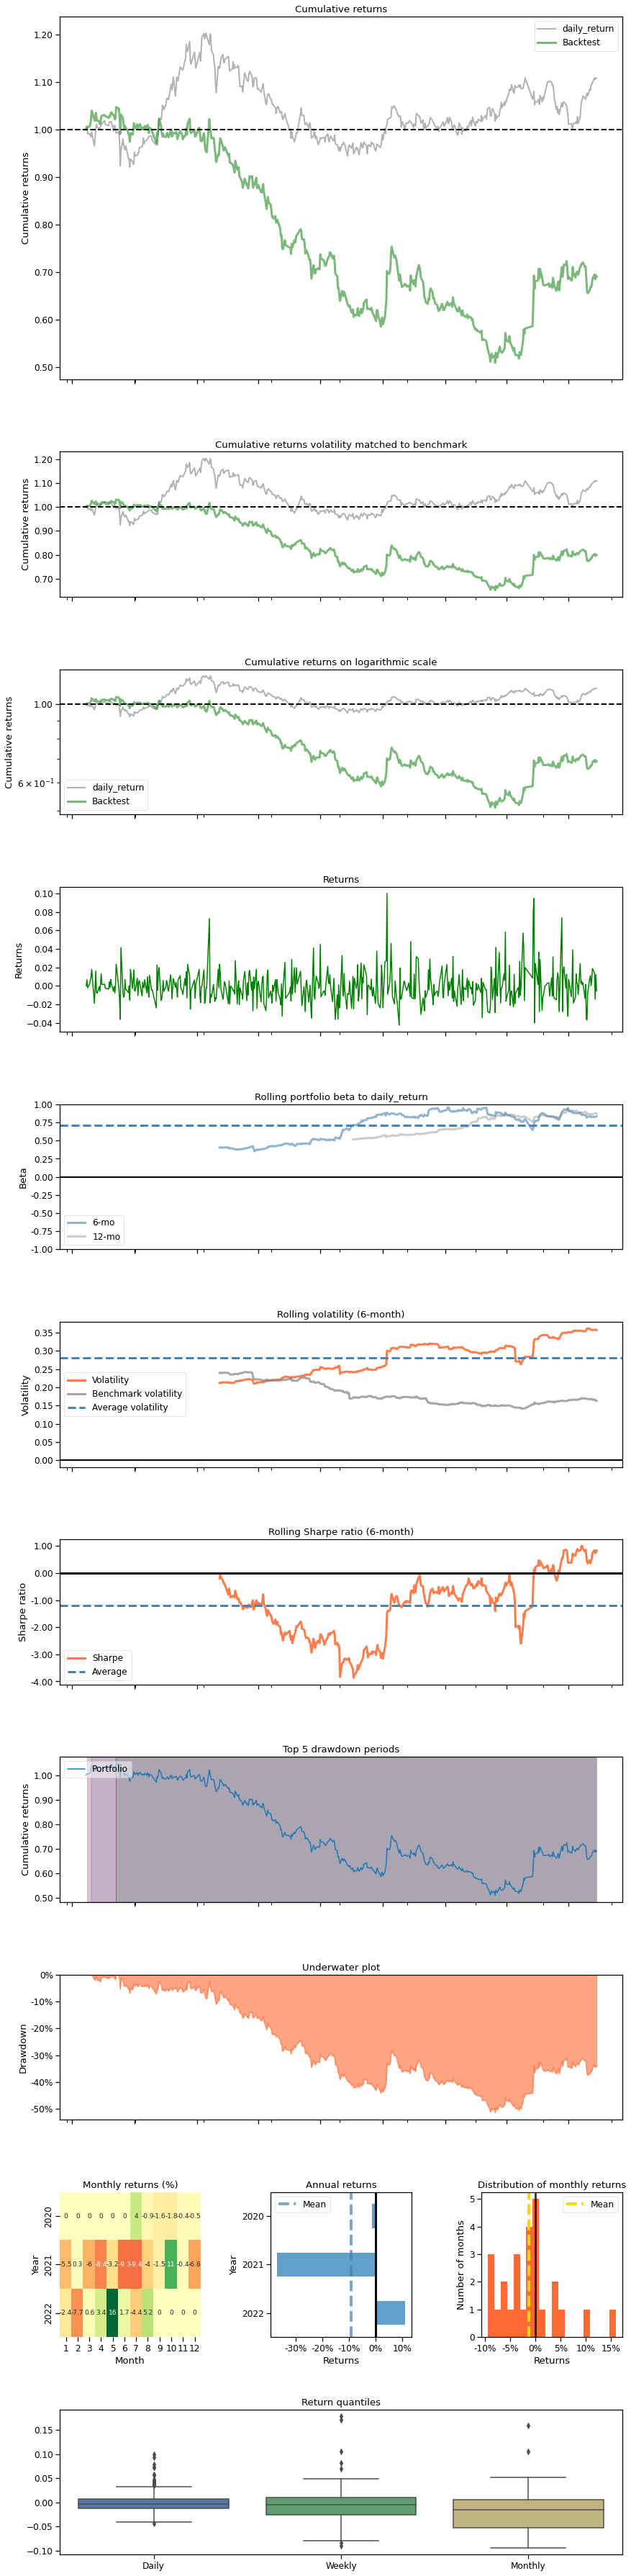

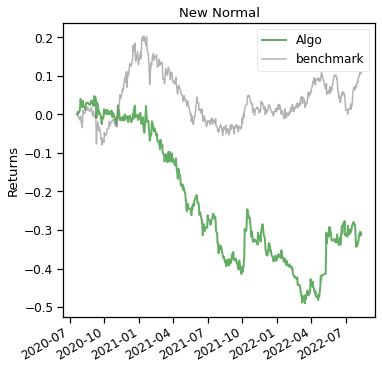

In [285]:
print("===========A2C Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_a2c, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_a2c.loc[0,'date'],
             baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

###8.2.2. Agen PPO

===========PPO Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (499, 8)


Start date,2020-07-21
End date,2022-08-11
Total months,23
,Backtest
Annual return,10.119%
Cumulative returns,20.431%
Annual volatility,48.112%
Sharpe ratio,0.44
Calmar ratio,0.23
Stability,0.07
Max drawdown,-43.701%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.70,2020-12-21,2022-07-05,NaT,NaN
1,17.92,2020-07-23,2020-09-24,2020-10-06,54
2,7.49,2020-10-22,2020-11-04,2020-11-10,14
3,5.83,2020-11-27,2020-11-30,2020-12-02,4
4,4.15,2020-11-10,2020-11-17,2020-11-23,10


Stress Events,mean,min,max
New Normal,0.08%,-12.66%,15.65%


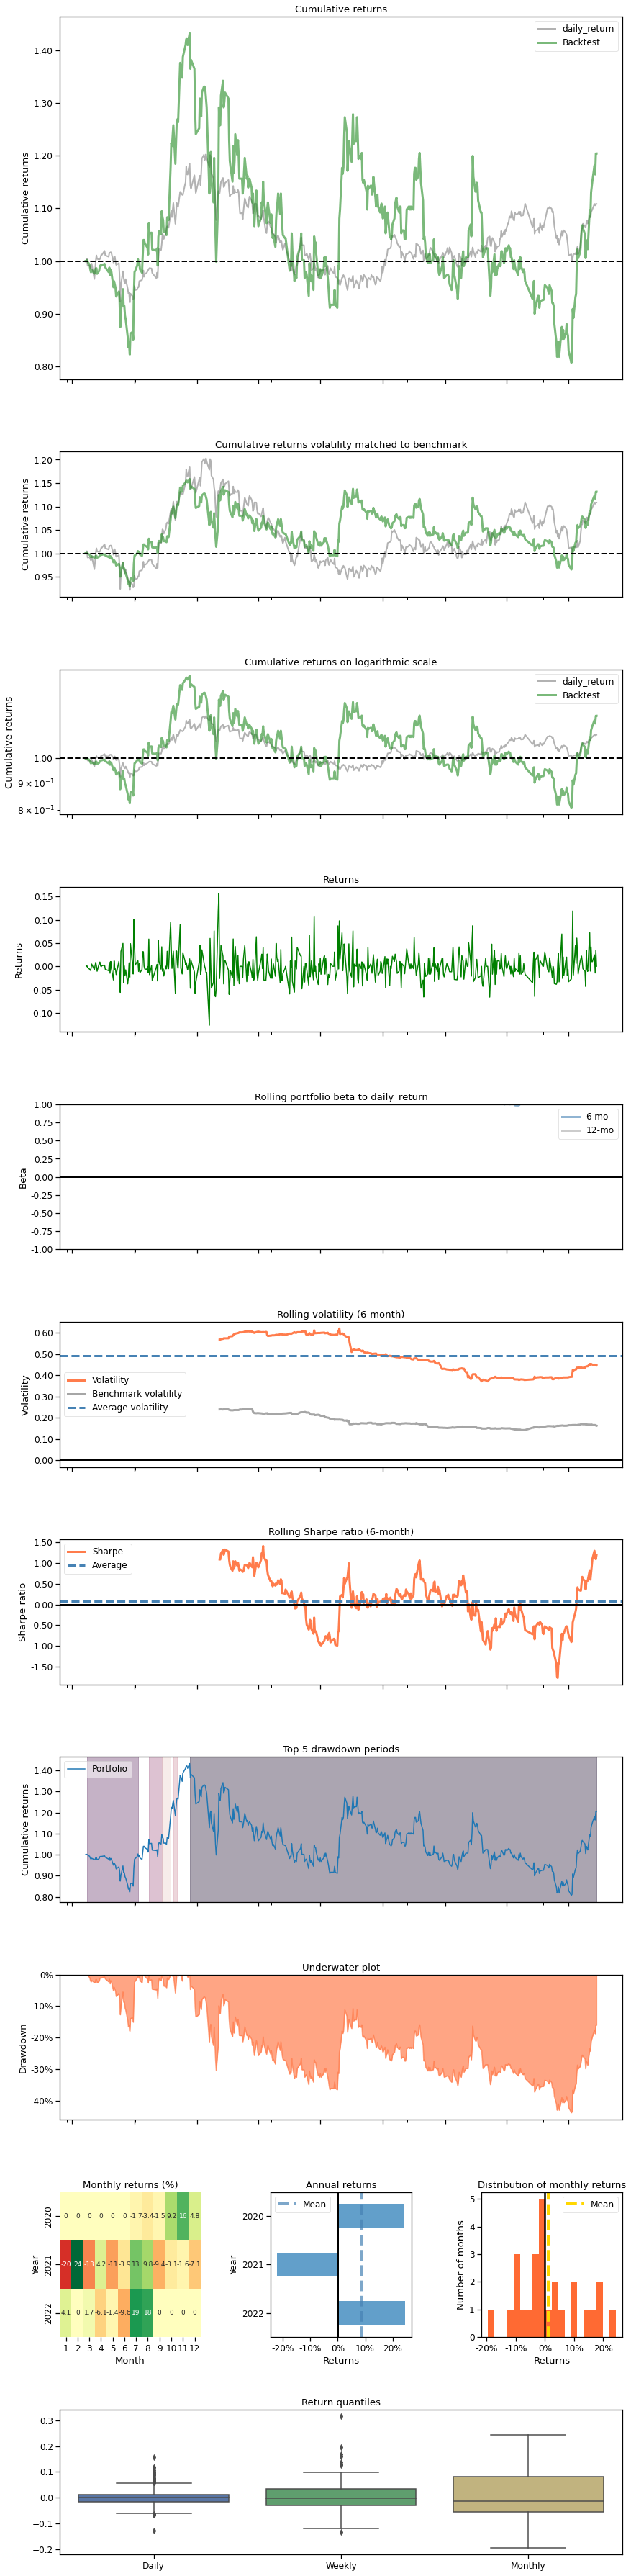

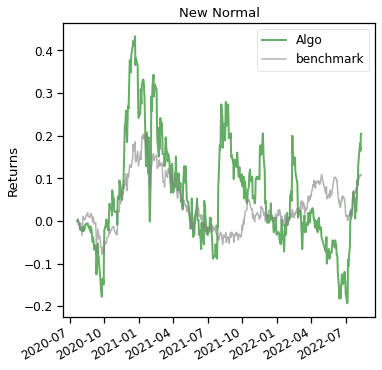

In [286]:
print("===========PPO Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ppo, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ppo.loc[0,'date'],
             baseline_end = df_account_value_ppo.loc[len(df_account_value_ppo)-1,'date'])

###8.2.3. Agen TD3

===========TD3 Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (499, 8)


Start date,2020-07-21
End date,2022-08-11
Total months,23
,Backtest
Annual return,0.196%
Cumulative returns,0.377%
Annual volatility,35.935%
Sharpe ratio,0.18
Calmar ratio,0.00
Stability,0.06
Max drawdown,-41.07%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.07,2020-12-21,2022-06-14,NaT,NaN
1,28.93,2020-07-23,2020-09-24,2020-11-23,88
2,3.27,2020-11-27,2020-11-30,2020-12-02,4
3,1.38,2020-12-16,2020-12-17,2020-12-21,4
4,0.50,2020-07-21,2020-07-22,2020-07-23,3


Stress Events,mean,min,max
New Normal,0.03%,-6.50%,9.53%


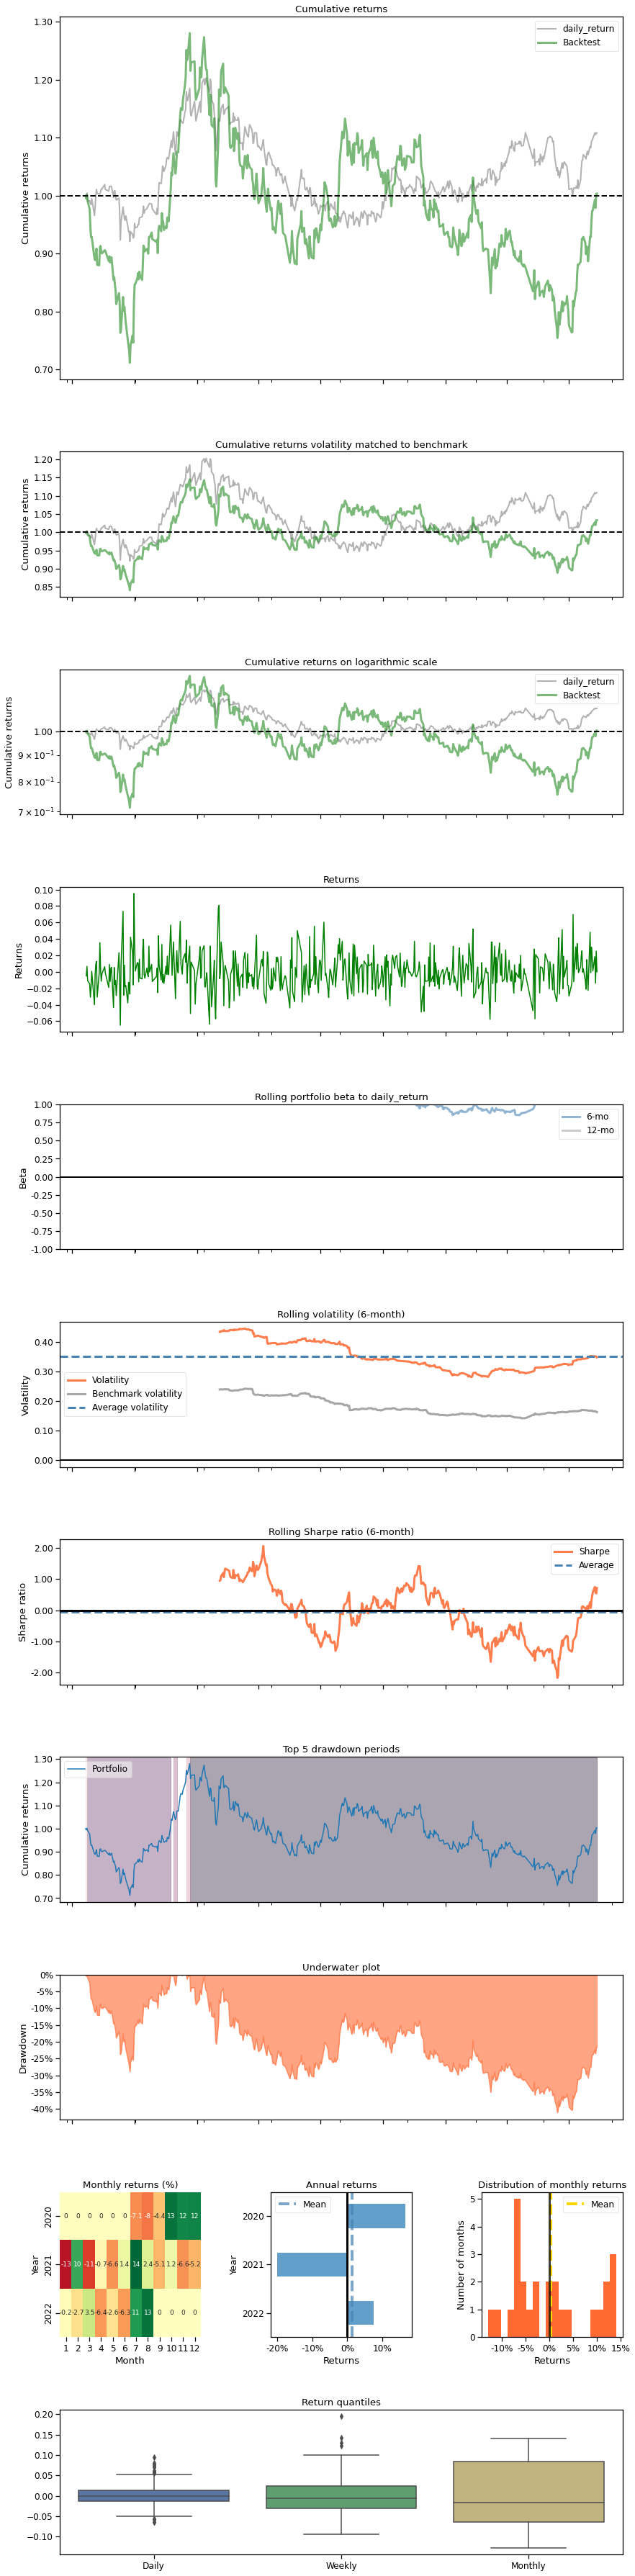

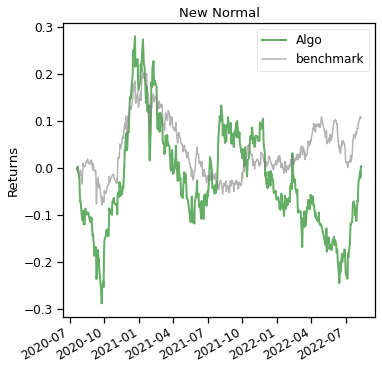

In [287]:
print("===========TD3 Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_td3, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_td3.loc[0,'date'],
             baseline_end = df_account_value_td3.loc[len(df_account_value_td3)-1,'date'])

###8.2.4. Agen SAC

============SAC Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (499, 8)


Start date,2020-07-21
End date,2022-08-11
Total months,23
,Backtest
Annual return,-15.378%
Cumulative returns,-27.533%
Annual volatility,26.204%
Sharpe ratio,-0.51
Calmar ratio,-0.33
Stability,0.69
Max drawdown,-45.925%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,45.92,2020-09-04,2022-03-15,NaT,NaN
1,2.06,2020-07-30,2020-08-11,2020-09-04,27
2,1.15,2020-07-23,2020-07-28,2020-07-30,6
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.05%,-3.99%,8.95%


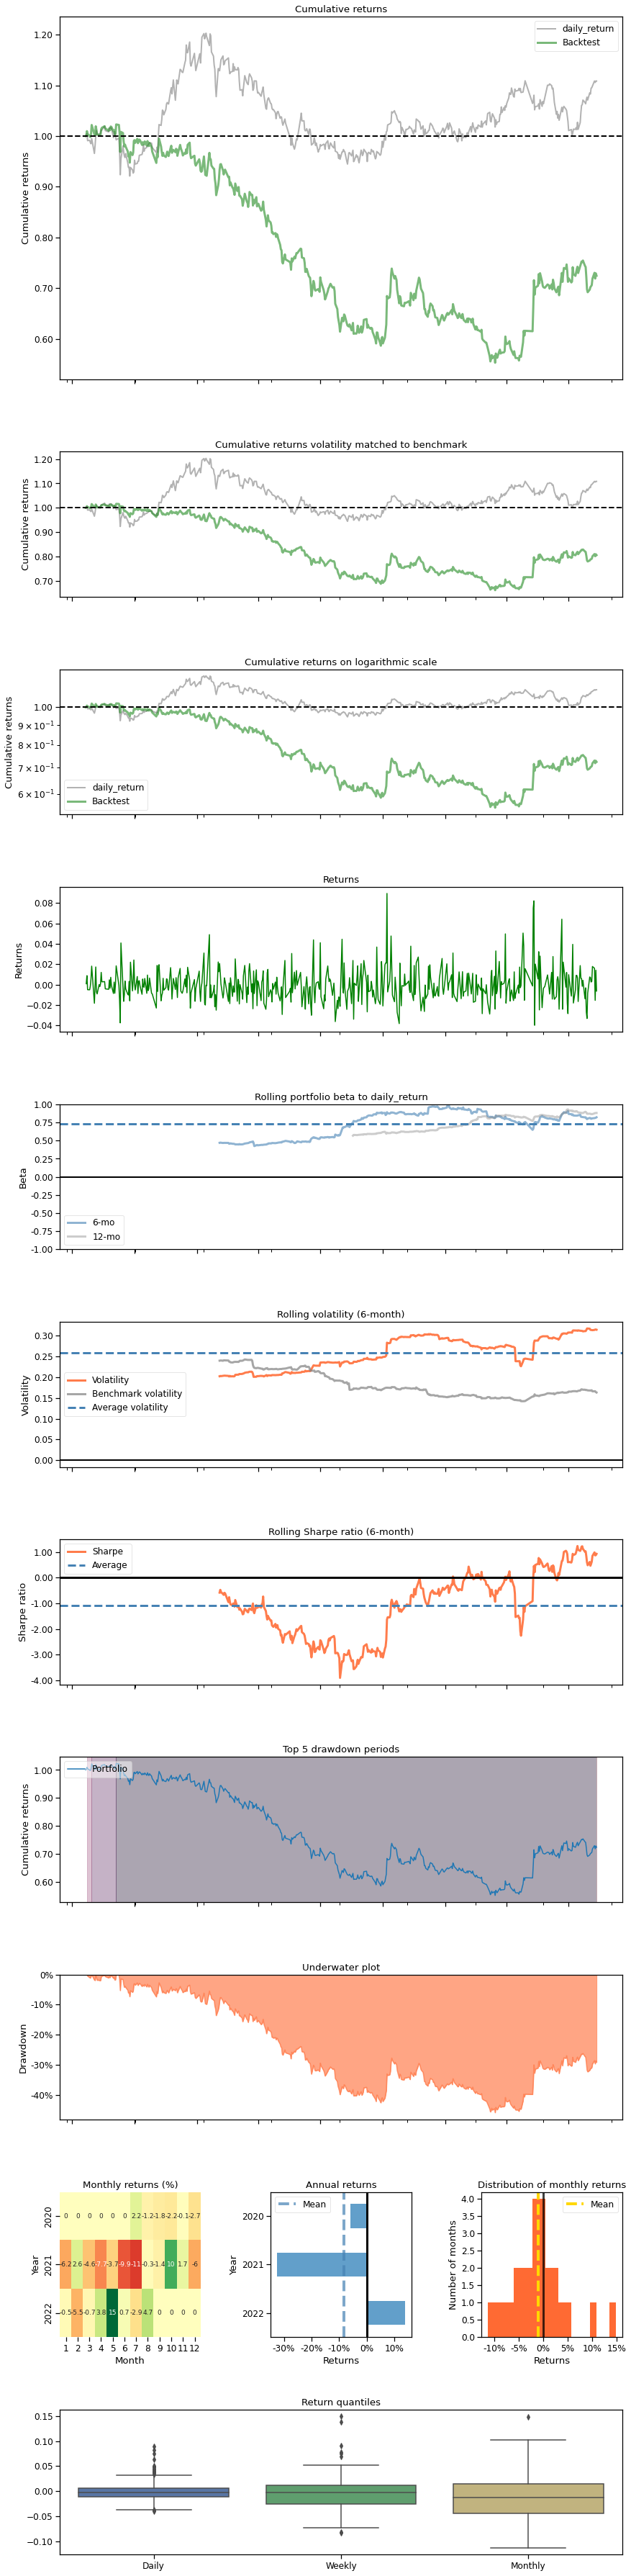

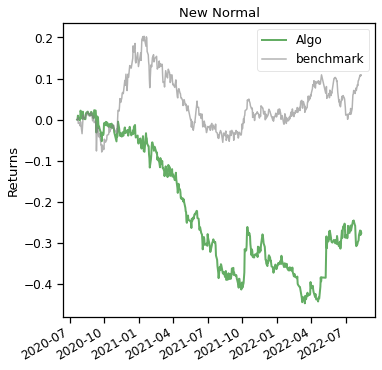

In [288]:
print("============SAC Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_sac, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_sac.loc[0,'date'],
             baseline_end = df_account_value_sac.loc[len(df_account_value_sac)-1,'date'])

###8.2.5. Agen DDPG

===========DDPG Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (499, 8)


Start date,2020-07-21
End date,2022-08-11
Total months,23
,Backtest
Annual return,-0.504%
Cumulative returns,-0.971%
Annual volatility,29.275%
Sharpe ratio,0.13
Calmar ratio,-0.02
Stability,0.05
Max drawdown,-25.595%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.59,2021-01-11,2021-07-26,NaT,NaN
1,22.06,2020-07-23,2020-09-22,2020-12-16,105
2,8.03,2020-12-21,2020-12-30,2021-01-11,16
3,0.52,2020-12-16,2020-12-18,2020-12-21,4
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,0.01%,-7.04%,10.90%


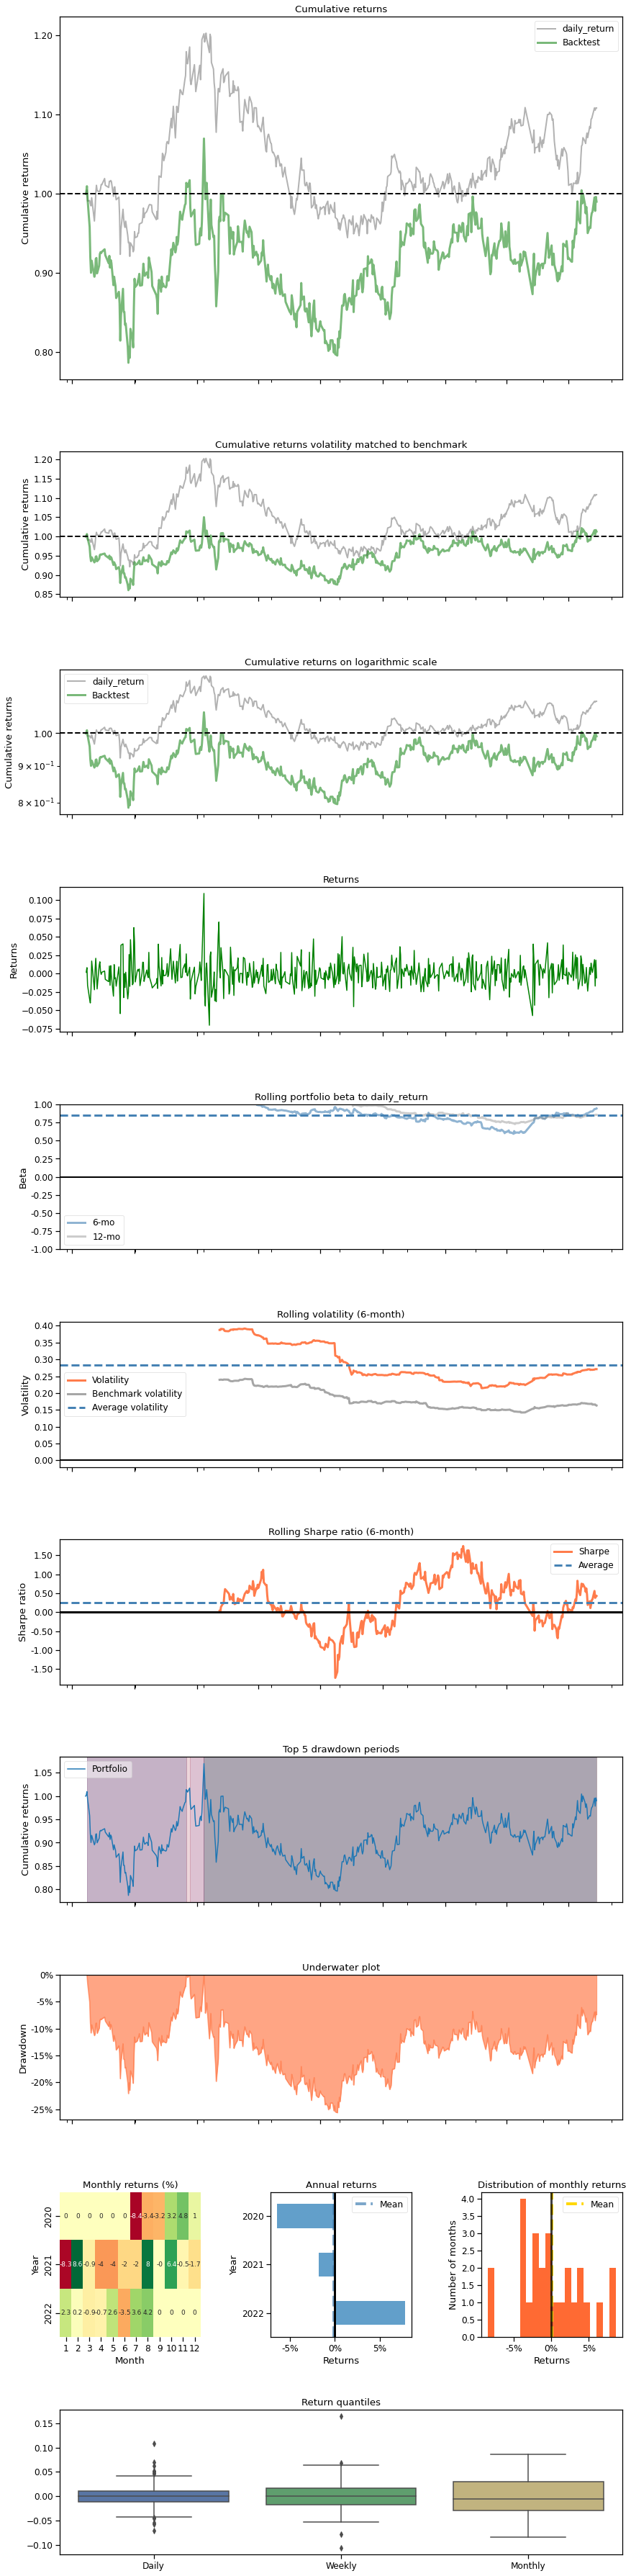

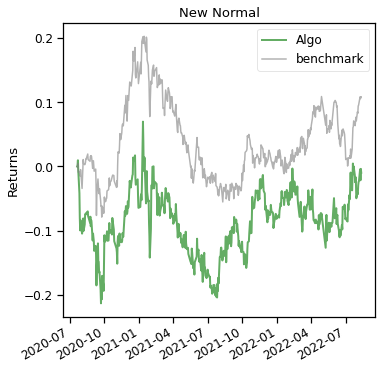

In [289]:
print("===========DDPG Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ddpg, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ddpg.loc[0,'date'],
             baseline_end = df_account_value_ddpg.loc[len(df_account_value_ddpg)-1,'date'])